In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from collections import Counter


In [23]:
files = ['chrome.csv','Edge.csv','Spotify_no_signin.csv','Spotify_signin.csv','YouTube_240.csv','YouTube_720.csv','YouTube_1080.csv','zoom.csv'] 
labels = ['chrome', 'Edge','Spotify_no_signin','Spotify_signin','YouTube_240','YouTube_720','YouTube_1080','zoom']

In [24]:
def plot_inter_arrival_time(filenames, labels):
    """
    Plots the inter-arrival time distribution for multiple packet capture files.

    This function reads multiple CSV files containing packet arrival timestamps, 
    calculates the inter-arrival times (the differences between consecutive timestamps), 
    and plots their distributions on a single histogram.

    Parameters:
    - filenames: List of file paths to CSV files containing a 'Time' column.
    - labels: List of labels corresponding to each file for the plot legend.

    The function prints the average inter-arrival time for each file and plots 
    a histogram of inter-arrival times for all files.
    """
    plt.figure(figsize=(12, 6))
    
    for file, label in zip(filenames, labels):
        df = pd.read_csv(file)
        if 'Time' not in df.columns:
            print(f"Error: File {file} does not contain a 'Time' column.")
            continue

        timestamps = df['Time'].values
        inter_arrival_times = np.diff(timestamps)
        avg_inter_arrival = np.mean(inter_arrival_times)

        print(f"File: {file}")
        print(f"    Average Inter-Arrival Time: {avg_inter_arrival:.6f} seconds")
        
        plt.hist(inter_arrival_times, bins=50, alpha=0.7, label=f'{label} - Inter-Arrival Time')
    
    plt.xlabel("Inter-arrival Time (seconds)")
    plt.ylabel("Frequency")
    plt.title("Inter-Arrival Time Distribution Across Files")
    plt.legend()
    plt.grid()
    plt.show()


File: chrome.csv
    Average Inter-Arrival Time: 0.002352 seconds
File: Edge.csv
    Average Inter-Arrival Time: 0.002488 seconds
File: Spotify_no_signin.csv
    Average Inter-Arrival Time: 0.032001 seconds
File: Spotify_signin.csv
    Average Inter-Arrival Time: 0.009611 seconds
File: YouTube_240.csv
    Average Inter-Arrival Time: 0.012356 seconds
File: YouTube_720.csv
    Average Inter-Arrival Time: 0.004891 seconds
File: YouTube_1080.csv
    Average Inter-Arrival Time: 0.003742 seconds
File: zoom.csv
    Average Inter-Arrival Time: 0.004999 seconds


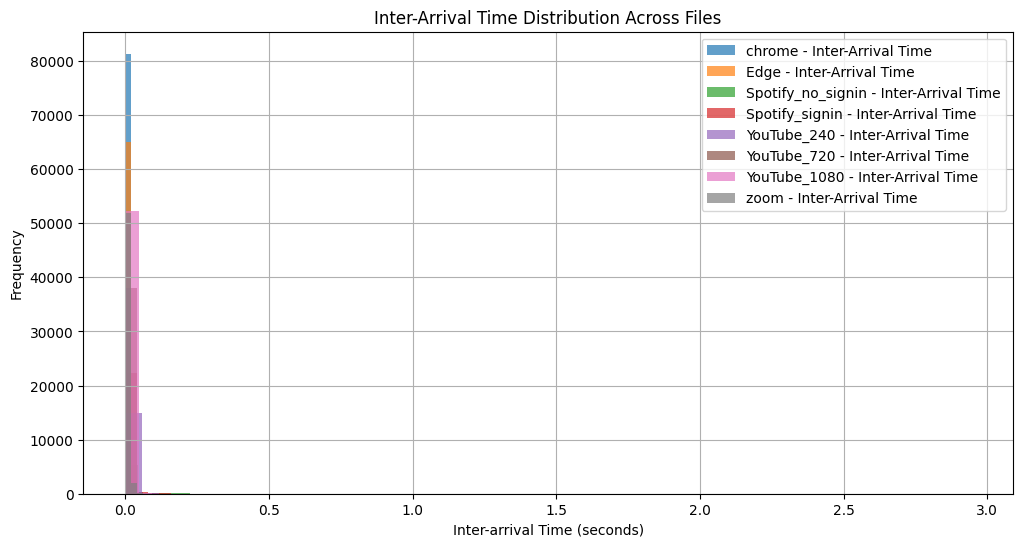

In [25]:
plot_inter_arrival_time(files,labels)

In [26]:
def plot_packet_size_distribution(filenames, labels, combinations=None):
    """
    Plots the packet size distribution for multiple network traffic capture files.

    This function reads multiple CSV files containing packet size information, 
    calculates statistics like the average packet size and standard deviation, 
    and generates histograms to visualize the distribution of packet sizes.

    Parameters:
    - filenames: List of file paths to CSV files containing a 'Length' column.
    - labels: List of labels corresponding to each file for the plot legend.
    - combinations: Groups of files to be plotted together for comparison.

    Functionality:
    1. Generates individual histograms for each file, showing the packet size distribution.
    2. Creates a combined histogram displaying packet size distributions from all files together.
    3. (Optional) If `combinations` is provided, it plots packet size distributions for specific 
       subsets of files together in separate histograms.

    The function prints the average packet size and standard deviation for each file.

    """
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']  

    for file, label, color in zip(filenames, labels, colors):
        plt.figure(figsize=(10, 6)) 

        df = pd.read_csv(file)
        sizes = df['Length'].tolist()

        avg_packet_size = sum(sizes) / len(sizes)
        print(f"File: {file}")
        print(f"    Average Packet Size: {avg_packet_size:.2f} bytes\n")

        plt.hist(sizes, bins=50, alpha=0.7, color=color, edgecolor='black')

        plt.xlabel("Packet Size (bytes)")
        plt.ylabel("Frequency")
        plt.title(f"Packet Size Distribution - {label}")
        plt.grid()

        plt.show()

    plt.figure(figsize=(12, 7))

    for file, label, color in zip(filenames, labels, colors):
        df = pd.read_csv(file)
        sizes = df['Length'].tolist()
        plt.hist(sizes, bins=50, alpha=0.5, label=label, color=color, edgecolor='black')
        avg_packet_size = sum(sizes) / len(sizes)
        std_dev = pd.Series(sizes).std() 
        print(f"File: {file}")
        print(f"    Average Packet Size: {avg_packet_size:.2f} bytes")
        print(f"    Standard Deviation: {std_dev:.2f} bytes\n")

    plt.xlabel("Packet Size (bytes)")
    plt.ylabel("Frequency")
    plt.title("Combined Packet Size Distribution")
    plt.legend()
    plt.grid()

    plt.show()

    if combinations:
        for i, combo in enumerate(combinations):
            plt.figure(figsize=(12, 7))

            for file in combo:
                idx = filenames.index(file)
                df = pd.read_csv(file)
                sizes = df['Length'].tolist()
                plt.hist(sizes, bins=50, alpha=0.5, label=labels[idx], color=colors[idx], edgecolor='black')

            plt.xlabel("Packet Size (bytes)")
            plt.ylabel("Frequency")
            plt.title(f"Packet Size Distribution - Combination {i+1}")
            plt.legend()
            plt.grid()
            plt.show()


File: chrome.csv
    Average Packet Size: 736.66 bytes


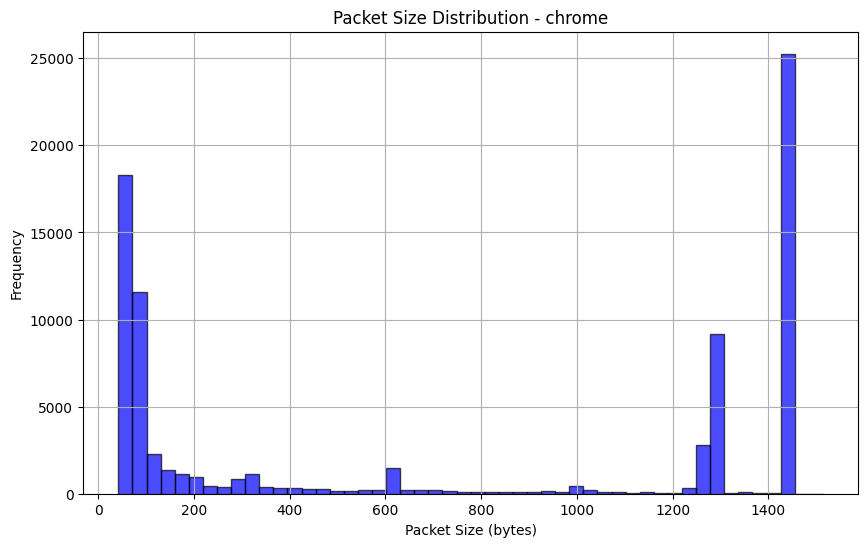

File: Edge.csv
    Average Packet Size: 797.19 bytes


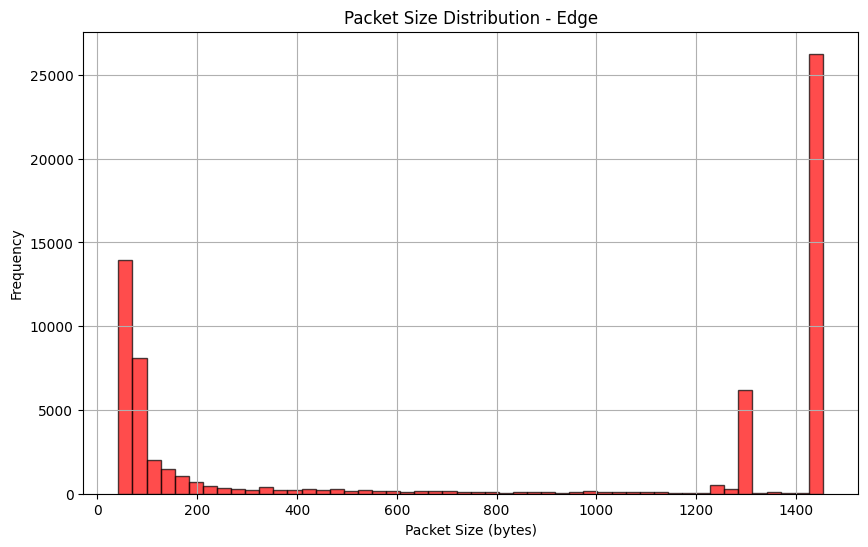

File: Spotify_no_signin.csv
    Average Packet Size: 614.07 bytes


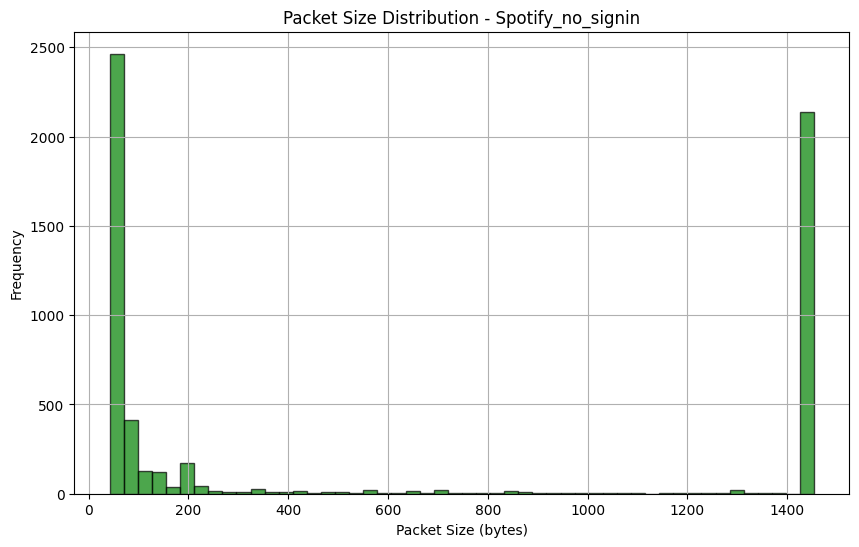

File: Spotify_signin.csv
    Average Packet Size: 611.64 bytes


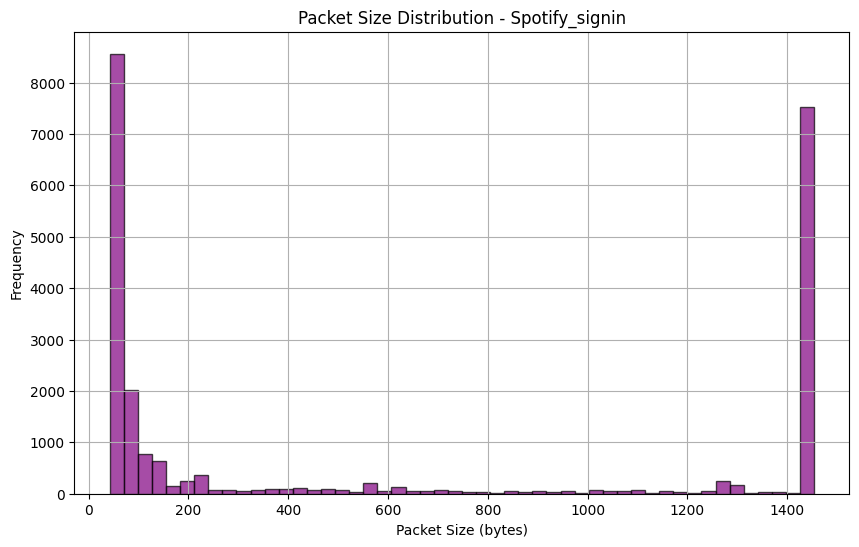

File: YouTube_240.csv
    Average Packet Size: 846.81 bytes


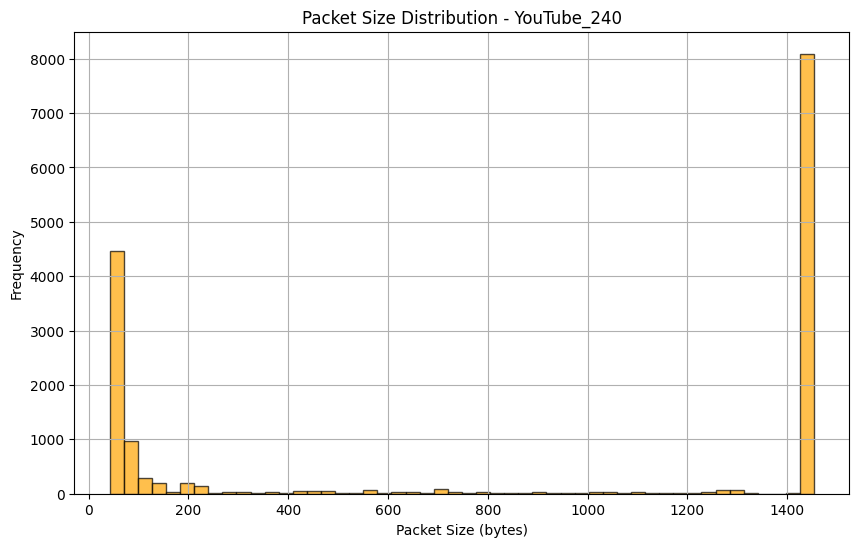

File: YouTube_720.csv
    Average Packet Size: 1024.62 bytes


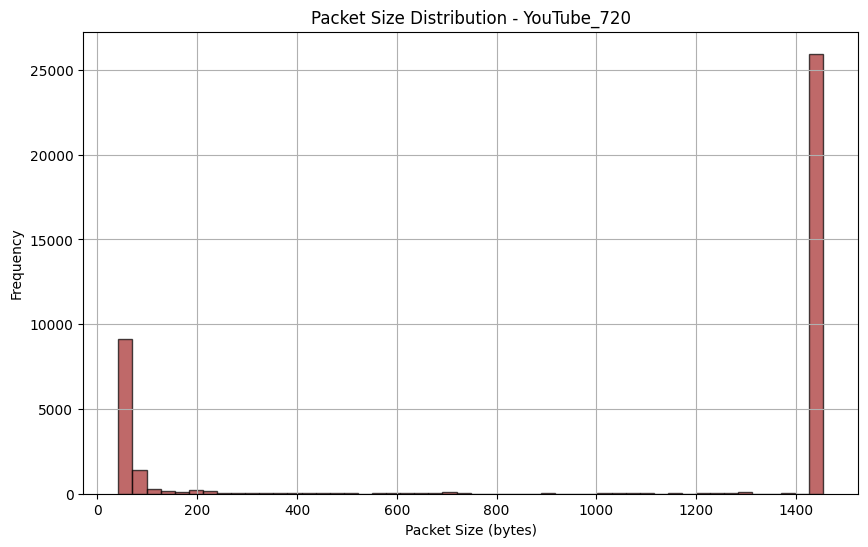

File: YouTube_1080.csv
    Average Packet Size: 1055.19 bytes


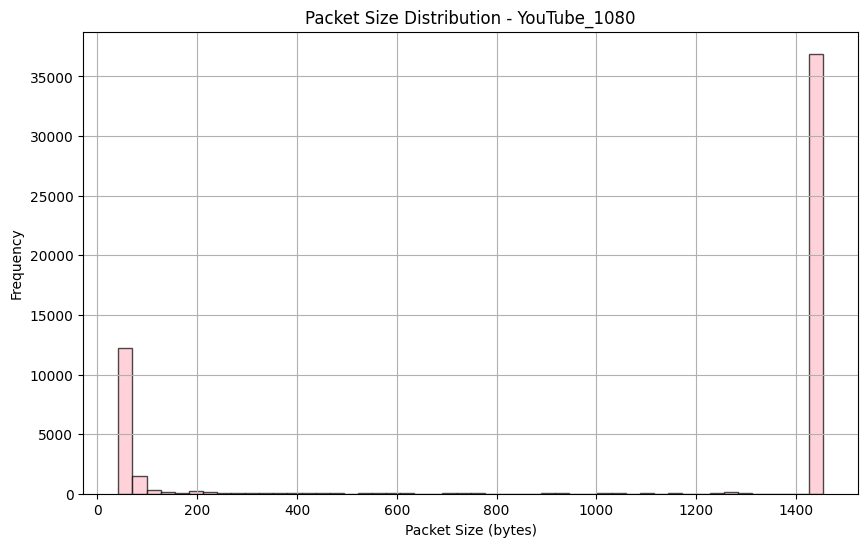

File: zoom.csv
    Average Packet Size: 541.90 bytes


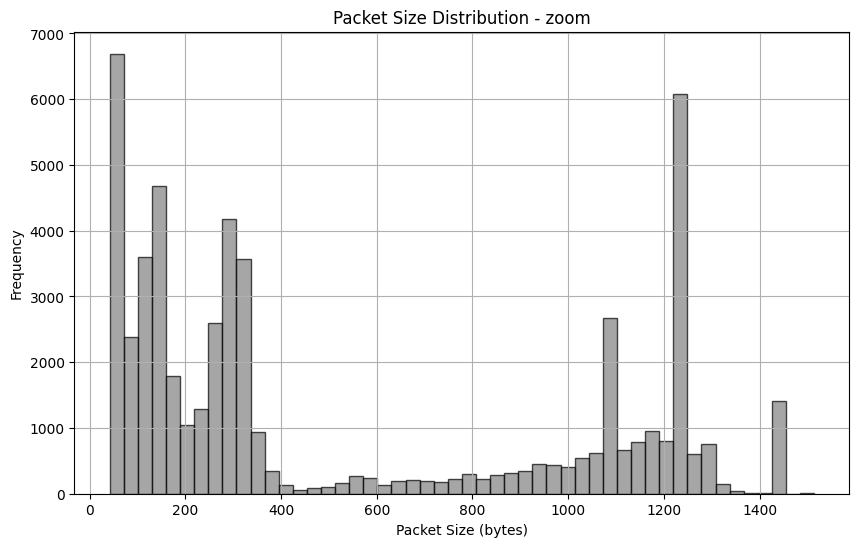

File: chrome.csv
    Average Packet Size: 736.66 bytes
    Standard Deviation: 632.49 bytes
File: Edge.csv
    Average Packet Size: 797.19 bytes
    Standard Deviation: 647.14 bytes

File: Spotify_no_signin.csv
    Average Packet Size: 614.07 bytes
    Standard Deviation: 658.93 bytes
File: Spotify_signin.csv
    Average Packet Size: 611.64 bytes
    Standard Deviation: 639.39 bytes
File: YouTube_240.csv
    Average Packet Size: 846.81 bytes
    Standard Deviation: 667.68 bytes
File: YouTube_720.csv
    Average Packet Size: 1024.62 bytes
    Standard Deviation: 632.43 bytes
File: YouTube_1080.csv
    Average Packet Size: 1055.19 bytes
    Standard Deviation: 621.89 bytes
File: zoom.csv
    Average Packet Size: 541.90 bytes
    Standard Deviation: 477.98 bytes


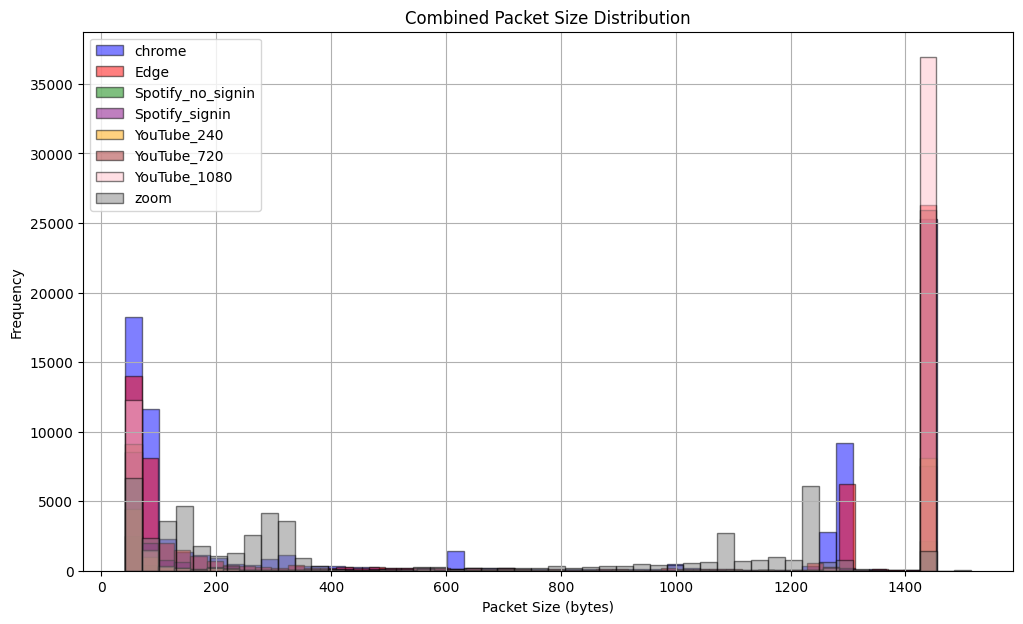

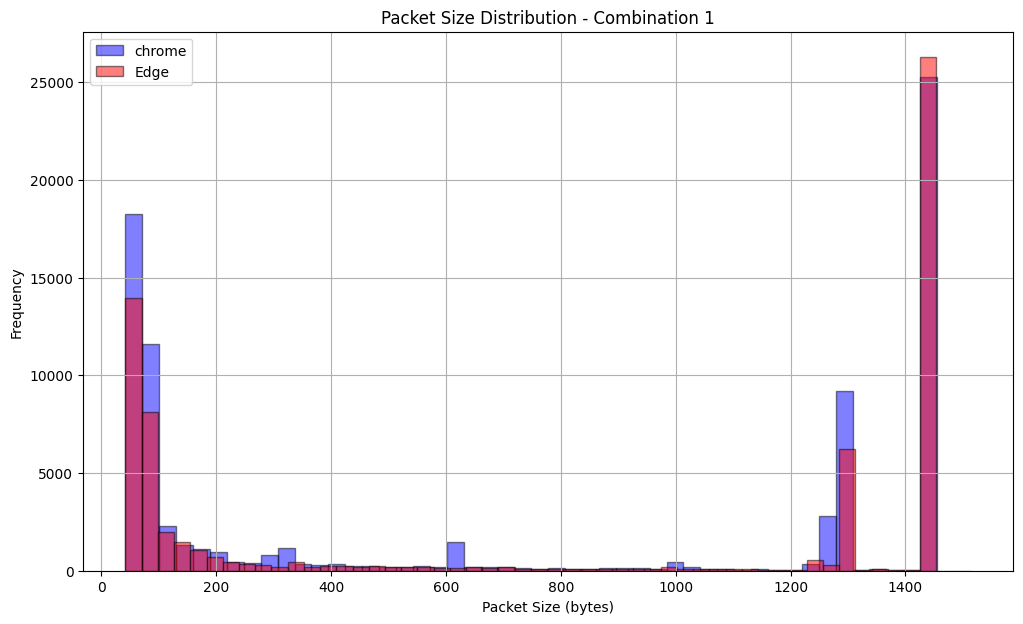

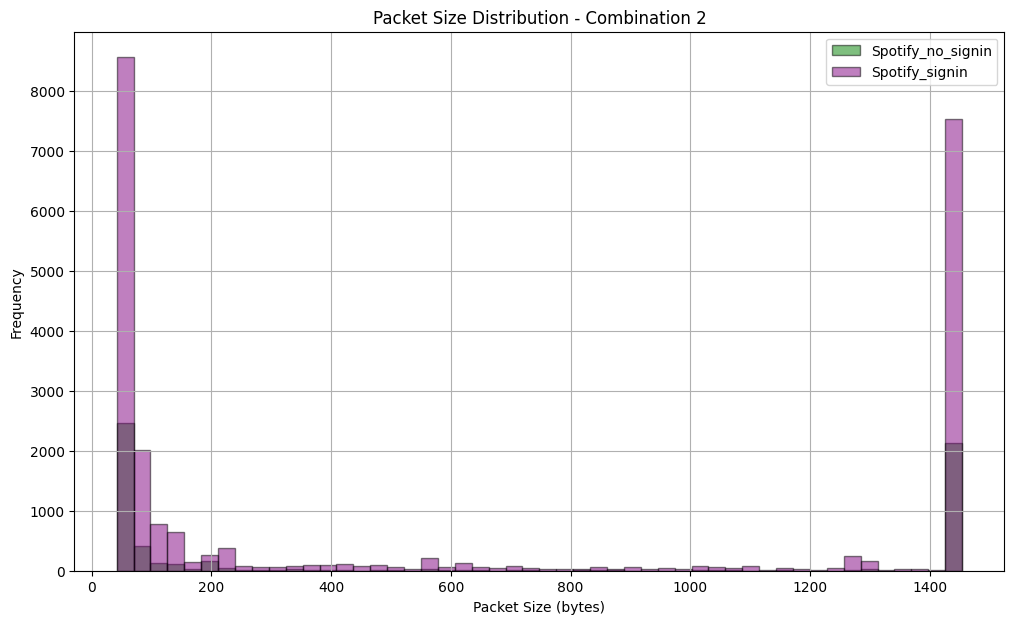

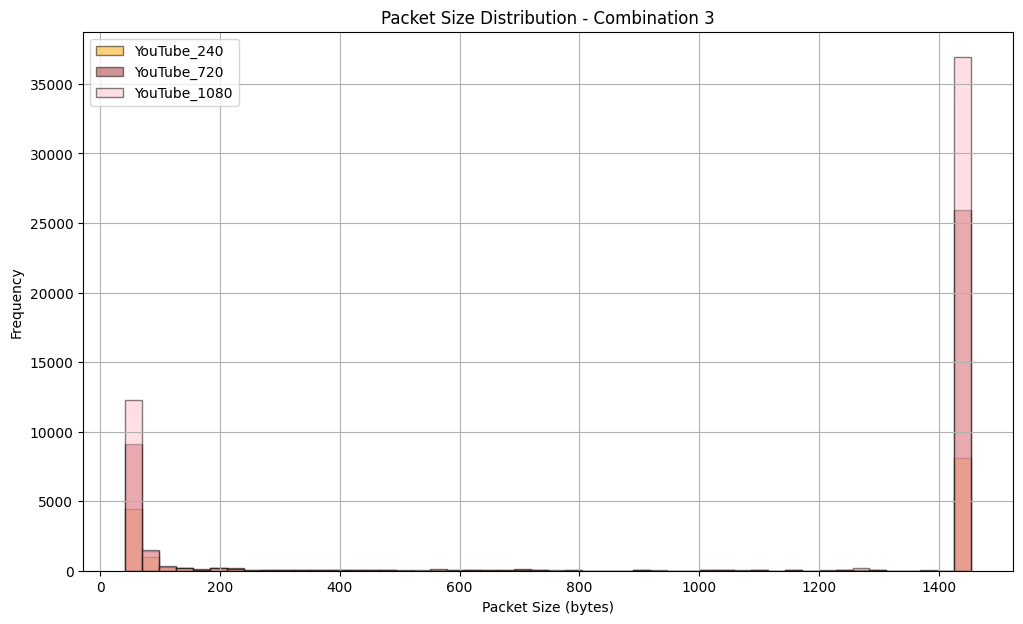

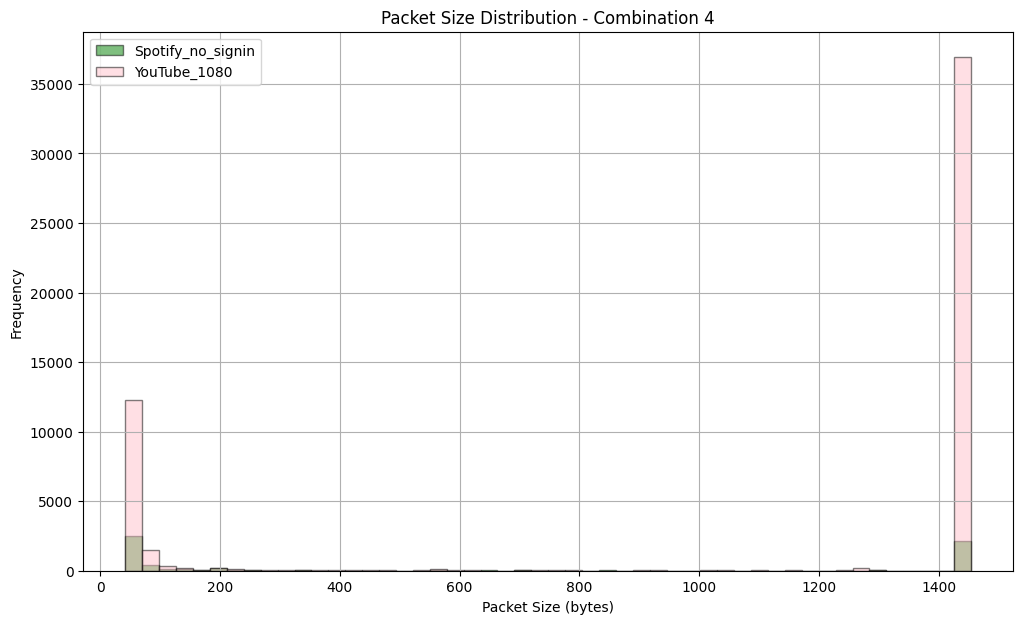

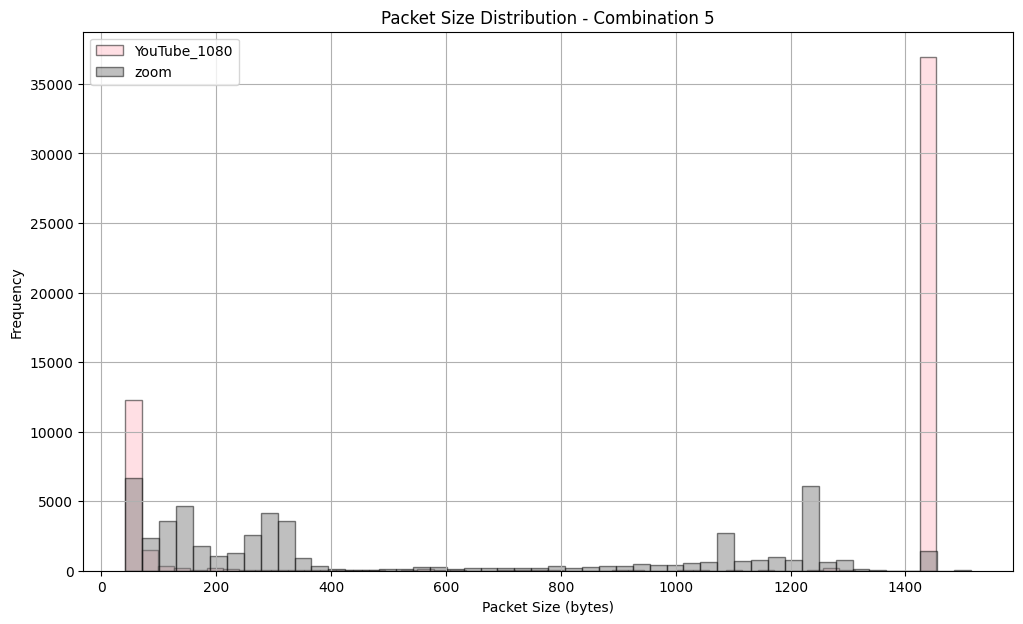

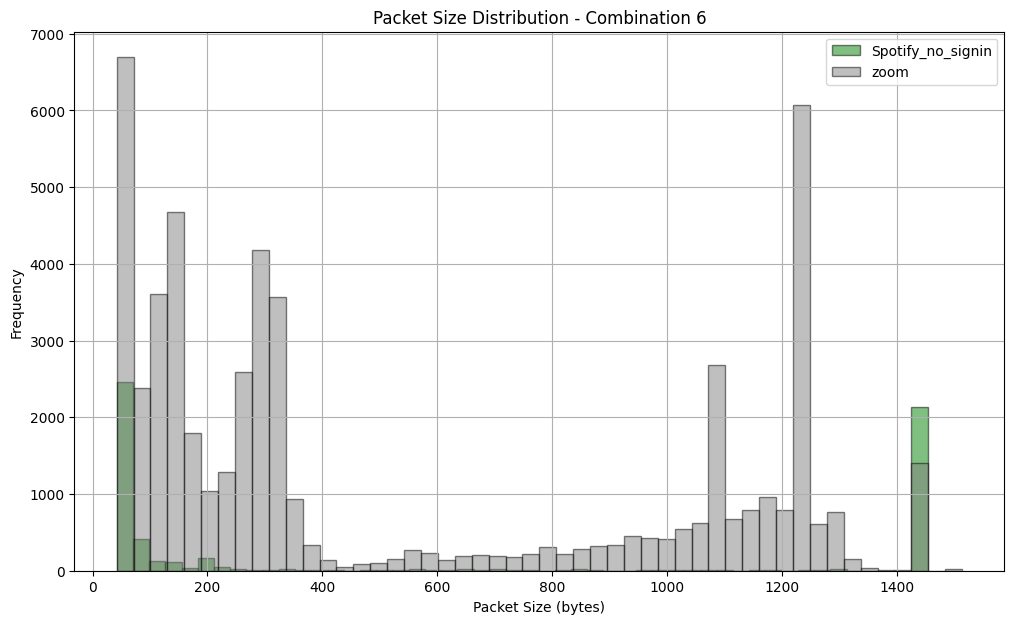

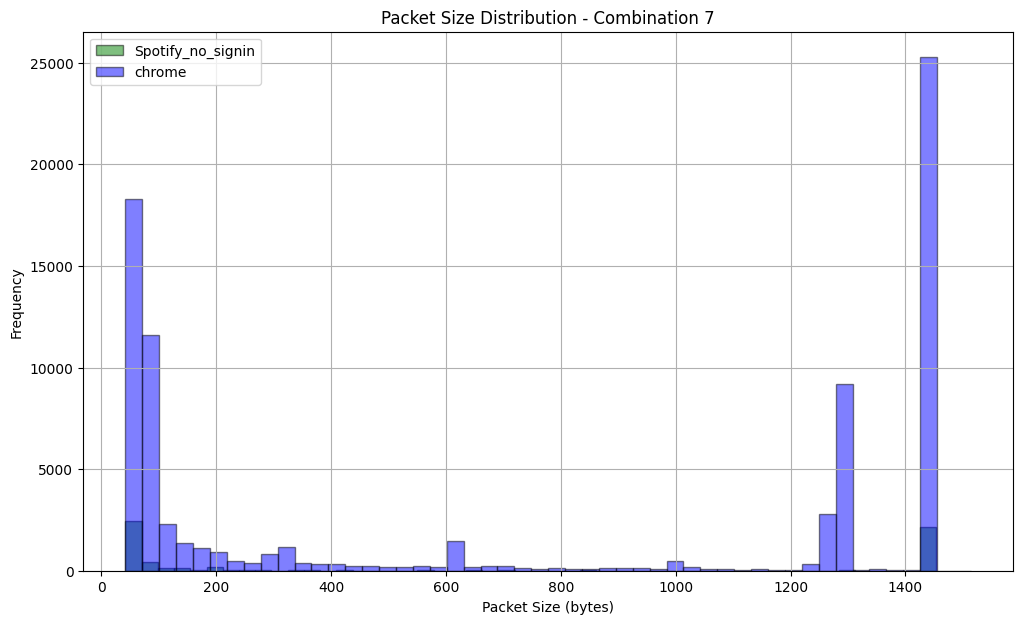

In [27]:
custom_combinations = [
    ['chrome.csv', 'Edge.csv'],  
    ['Spotify_no_signin.csv','Spotify_signin.csv'],  
    ['YouTube_240.csv', 'YouTube_720.csv', 'YouTube_1080.csv'],
    ['Spotify_no_signin.csv','YouTube_1080.csv'],
    ['YouTube_1080.csv','zoom.csv'],
    ['Spotify_no_signin.csv','zoom.csv'],
    ['Spotify_no_signin.csv','chrome.csv']
    
]
plot_packet_size_distribution(files,labels,custom_combinations)


# explanation: the point of this script is to plot out "big gaps" between packages being sent. the way "big gaps" are
# categorized is as follows: all packets that are labeled in a single second in a pcap file (e.g. a packet that was recorded
# at 17.3 seconds and a packet that was recorded at 17.8 seconds) would be put into the same bin. if a bin has less than 15
# members it gets deleted. after this we calculate the time in between the last packet of a bin and the first packet of the
# following bin. plotting the "big gaps" serves to try and look at the downtime in each type of pcap recording, and frankly
# the data from this script is only useful when comparing data created from it.

In [28]:
def process_large_gaps(file, min_packets_per_bin=15):
    """
    Identifies large gaps between valid time bins in a network traffic dataset.

    This function processes a CSV file containing packet timestamps and groups them into 
    one-second bins. It then filters out bins that contain fewer than the specified 
    minimum number of packets. Finally, it calculates the time gaps between consecutive 
    valid bins by measuring the difference between the last packet of one bin and 
    the first packet of the next bin.

    Parameters:
    - file: Path to the CSV file containing a 'Time' column with packet timestamps.
    - min_packets_per_bin: Minimum number of packets required for a bin 
      to be considered valid. Default is 15.

    Returns:
    - large_gaps: A list of time gaps (in seconds) between consecutive 
      valid bins. If there are not enough valid bins, an empty list is returned.

    Function Steps:
    1. Reads the CSV file and extracts the 'Time' column.
    2. Sorts the timestamps and groups them into one-second bins.
    3. Filters out bins that contain fewer than `min_packets_per_bin` packets.
    4. Computes the time difference between the last packet of one bin and the first 
       packet of the next valid bin.
    5. Returns a list of these large gaps.

    If the number of valid bins is less than two, the function prints a message and 
    returns an empty list.
    """
    df = pd.read_csv(file,encoding='ISO-8859-1')
    timestamps = df['Time'].tolist()
    timestamps.sort()

    bins = {}
    for ts in timestamps:
        second = int(ts) 
        if second not in bins:
            bins[second] = []
        bins[second].append(ts)

    valid_bins = {sec: ts_list for sec, ts_list in bins.items() if len(ts_list) >= min_packets_per_bin}
    if len(valid_bins) < 2:
        print(f"File: {file} - Not enough valid bins for large gap analysis.")
        return []

    large_gaps = []
    sorted_bins = sorted(valid_bins.keys())
    for i in range(len(sorted_bins) - 1):
        last_pkt_prev_bin = max(valid_bins[sorted_bins[i]])
        first_pkt_next_bin = min(valid_bins[sorted_bins[i + 1]])
        large_gaps.append(first_pkt_next_bin - last_pkt_prev_bin)

    return large_gaps

In [29]:
def plot_large_gaps(files, labels, plot_together=False):
    """
    Plots the distribution of large time gaps between valid time bins in network traffic data.

    This function processes multiple CSV files to identify large gaps between time bins 
    that meet a minimum packet count requirement. It then generates histograms to visualize 
    the distribution of these large gaps.

    Parameters:
    - files: List of file paths to CSV files containing packet timestamps.
    - labels: List of labels corresponding to each file for the plot legend.
    - plot_together: If True, plots all datasets in a single histogram 
      for comparison. If False (default), plots separate histograms for each dataset.

    Functionality:
    1. Calls process_large_gaps(file) for each file to compute large gaps.
    2. Prints the average large gap for each file.
    3. Plots individual histograms for each file unless plot_together=True.
    4. If plot_together=True, creates a combined histogram overlaying all datasets.

    The function helps in analyzing and comparing large time gaps in different packet traces.
    """
    all_large_gaps = []
    
    for file, label in zip(files, labels):
        large_gaps = process_large_gaps(file)
        if large_gaps:
            avg_large_gap = float(np.mean(large_gaps))
            print(f"File: {file} - Average Large Gap: {avg_large_gap:.6f} seconds")
            
            all_large_gaps.append((large_gaps, label))
            
            if not plot_together:
                plt.figure(figsize=(10, 6))
                plt.hist(large_gaps, bins=50, alpha=0.7, color='red', edgecolor='black')
                plt.xlabel("Large Gaps (seconds)")
                plt.ylabel("Frequency")
                plt.title(f"Large Gaps Distribution - {label}")
                plt.grid()
                plt.show()
    
    if plot_together and all_large_gaps:
        plt.figure(figsize=(10, 6))
        for large_gaps, label in all_large_gaps:
            plt.hist(large_gaps, bins=50, alpha=0.5, edgecolor='black', label=label)
        
        plt.xlabel("Large Gaps (seconds)")
        plt.ylabel("Frequency")
        plt.title("Large Gaps Distribution - Combined")
        plt.legend()
        plt.grid()
        plt.show()

File: chrome.csv - Average Large Gap: 0.317550 seconds


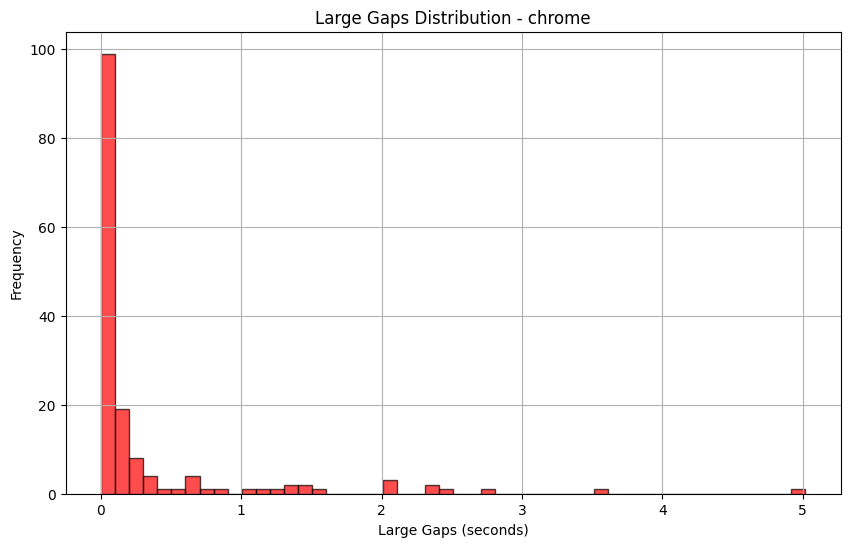

File: Edge.csv - Average Large Gap: 0.284707 seconds


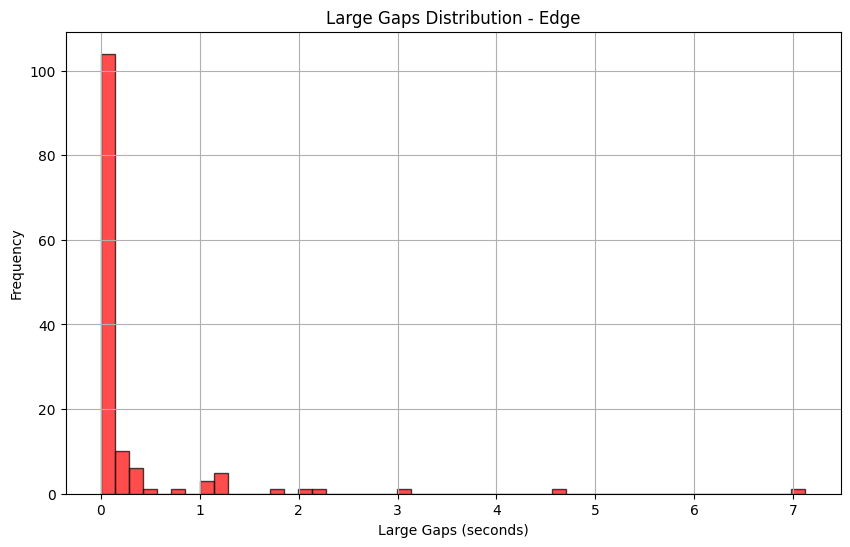

File: Spotify_no_signin.csv - Average Large Gap: 2.198915 seconds


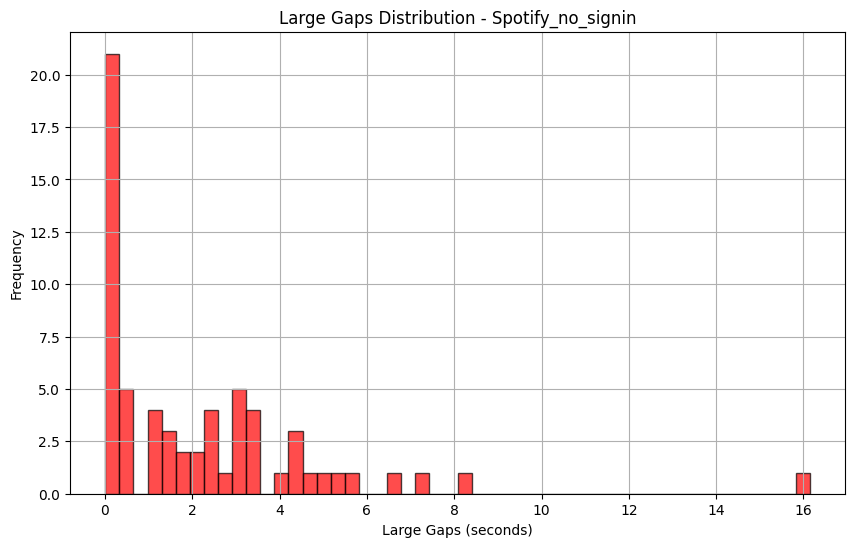

File: Spotify_signin.csv - Average Large Gap: 1.252155 seconds


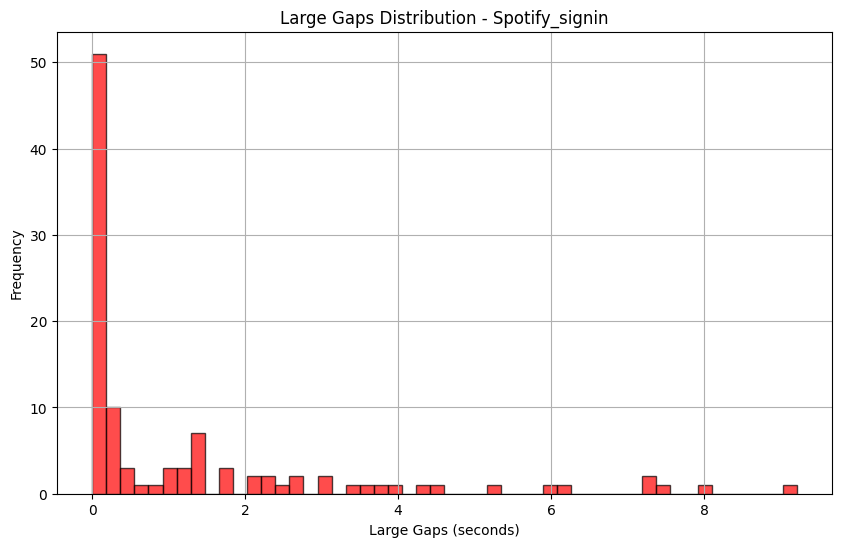

File: YouTube_240.csv - Average Large Gap: 1.911645 seconds


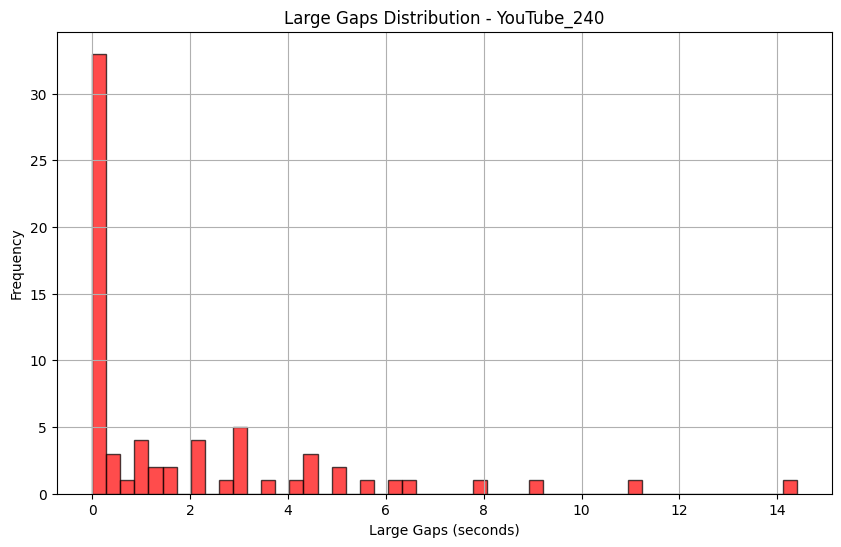

File: YouTube_720.csv - Average Large Gap: 1.350778 seconds


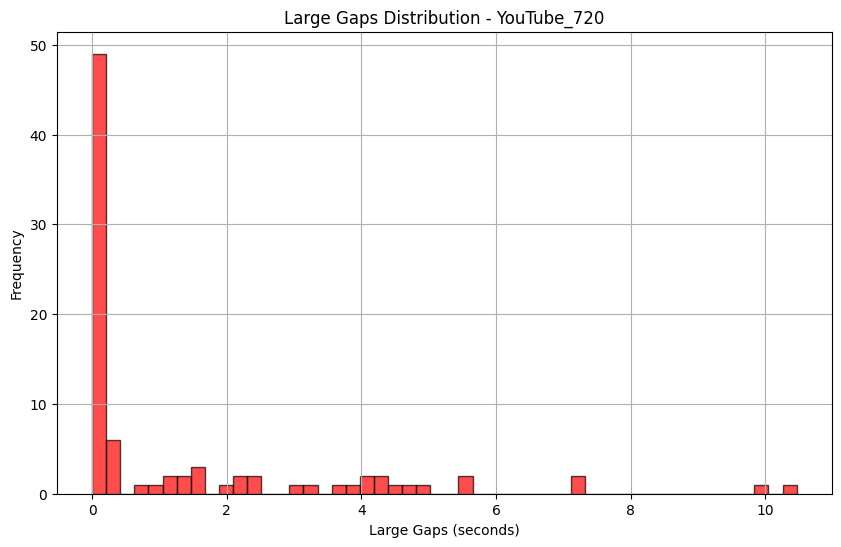

File: YouTube_1080.csv - Average Large Gap: 1.214111 seconds


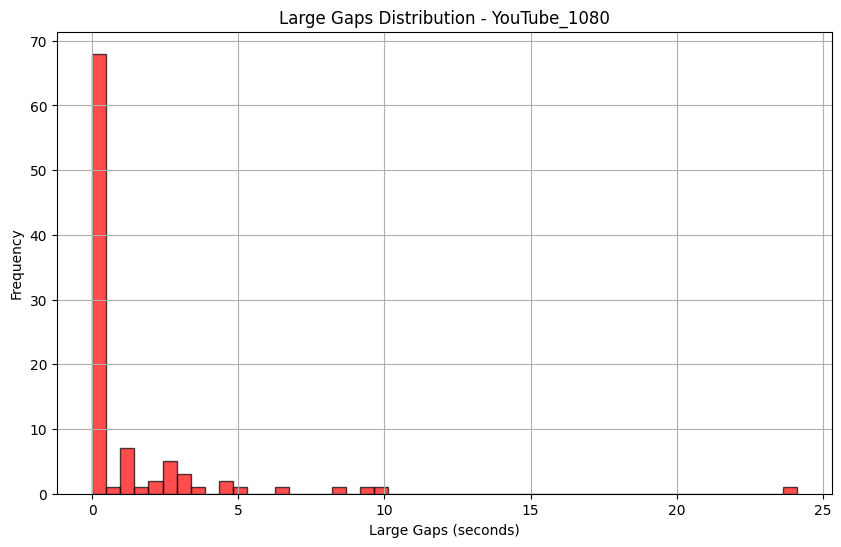

File: zoom.csv - Average Large Gap: 0.067869 seconds


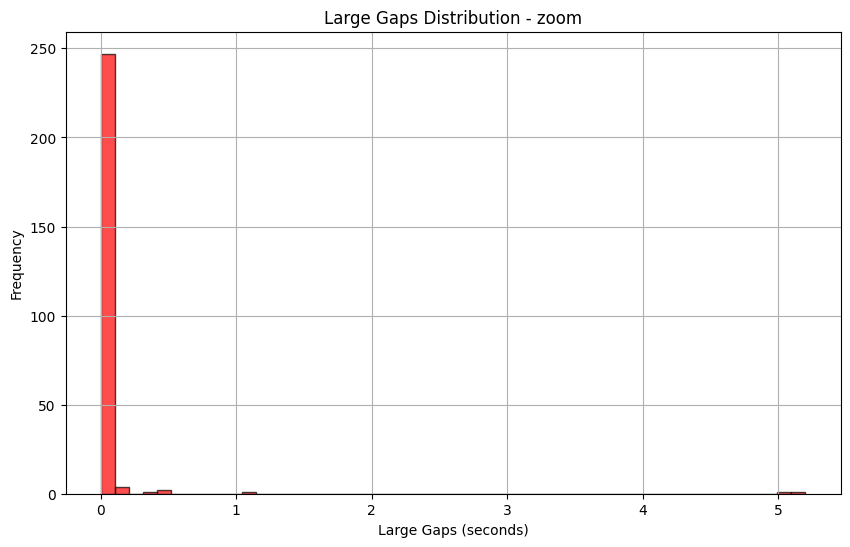

File: chrome.csv - Average Large Gap: 0.317550 seconds
File: Edge.csv - Average Large Gap: 0.284707 seconds
File: Spotify_no_signin.csv - Average Large Gap: 2.198915 seconds
File: Spotify_signin.csv - Average Large Gap: 1.252155 seconds
File: YouTube_240.csv - Average Large Gap: 1.911645 seconds
File: YouTube_720.csv - Average Large Gap: 1.350778 seconds
File: YouTube_1080.csv - Average Large Gap: 1.214111 seconds
File: zoom.csv - Average Large Gap: 0.067869 seconds


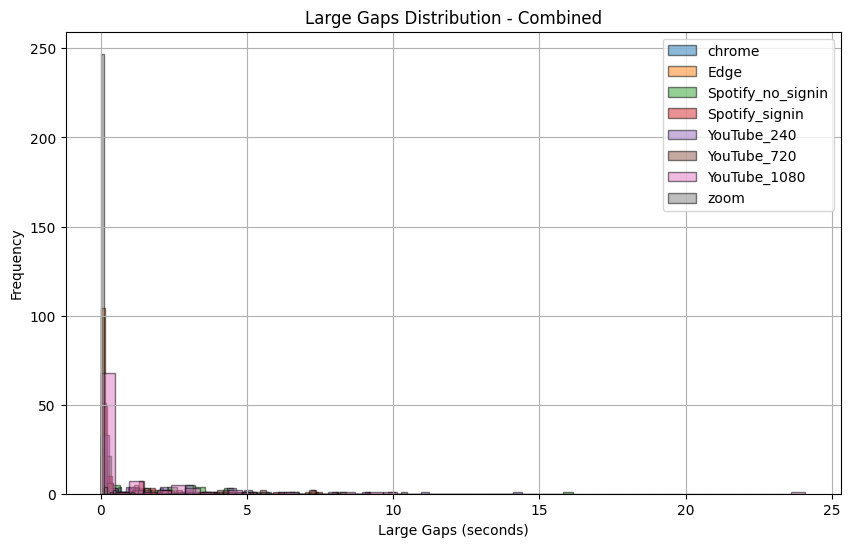

In [30]:
plot_large_gaps(files,labels)
plot_large_gaps(files,labels,True)

## bonus

File: bonus.csv - Average Large Gap: 0.653684 seconds


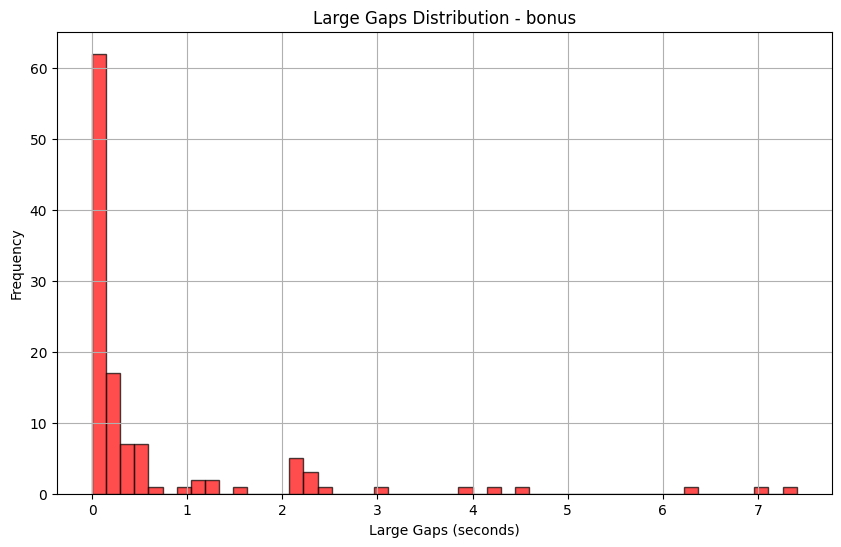

In [31]:
plot_large_gaps(files = ['bonus.csv'],labels = ['bonus']) 

In [32]:
def analyze_packet_count_by_protocol(filenames):
    """
    Analyzes and visualizes the distribution of packets by protocol in multiple network traffic datasets.

    This function reads CSV files containing network packet data, counts the occurrences 
    of each protocol, and generates bar charts to visualize the packet distribution.

    Parameters:
    - filenames: List of file paths to CSV files containing a 'Protocol' column.

    Functionality:
    1. Reads each CSV file into a pandas DataFrame.
    2. Iterates through the dataset and counts the number of packets per protocol.
    3. Prints the packet count for each protocol.
    4. Plots a bar chart showing the packet distribution for each protocol.

    The function helps in analyzing network traffic characteristics by visualizing 
    protocol usage distribution.

    """
    for file in filenames:
        # Load CSV file into a DataFrame
        df = pd.read_csv(file,encoding='ISO-8859-1')

        # Initialize dictionary to count packets by protocol
        protocol_packet_count = defaultdict(int)

        # Loop through each row in the CSV and count protocols
        for _, row in df.iterrows():
            protocol = row['Protocol']  # Assuming 'Protocol' column contains the protocol info
            protocol_packet_count[protocol] += 1

        # Assuming we have some known protocols, else just use the protocol names as they are
        print(f"\nFile: {file}")
        for proto, count in protocol_packet_count.items():
            print(f"    {proto}: {count} packets")
        print("\n")

        # Extract protocol names and counts for plotting
        protocols = list(protocol_packet_count.keys())
        packet_counts = list(protocol_packet_count.values())

        # Plot the packet distribution by protocol
        plt.figure(figsize=(10, 6))
        plt.bar(protocols, packet_counts, color='orange', edgecolor='black')
        plt.xlabel("Protocol")
        plt.ylabel("Number of Packets")
        plt.title(f"Packet Distribution by Protocol in {file}")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


File: chrome.csv
    UDP: 373 packets
    TCP: 33748 packets
    DNS: 800 packets
    QUIC: 22597 packets
    TLSv1.3: 5840 packets
    HTTP3: 10514 packets
    HTTP2: 7078 packets
    MDNS: 782 packets
    HTTP2/JSON: 175 packets
    AJP13: 2 packets
    LLMNR: 8 packets
    ARP: 41 packets
    HTTP: 83 packets
    TLSv1.2: 627 packets
    HTTP2/XML: 3 packets
    ICMP: 12 packets
    MP4: 4 packets
    IGMPv3: 6 packets
    ICMPv6: 5 packets
    SSDP: 5 packets


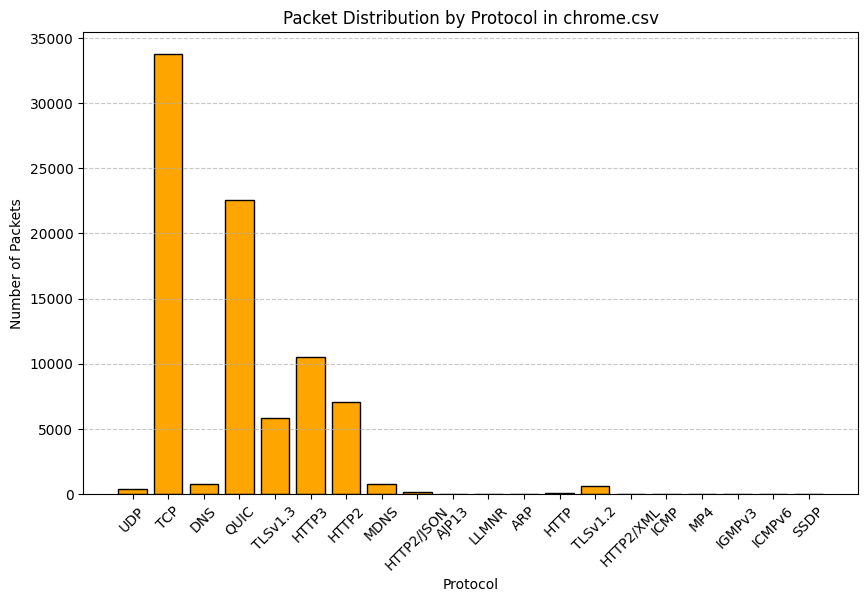


File: Edge.csv
    UDP: 312 packets
    UDP/XML: 35 packets
    DNS: 2789 packets
    TCP: 33513 packets
    TLSv1.3: 10978 packets
    MDNS: 664 packets
    TLSv1.2: 1255 packets
    QUIC: 16920 packets
    ICMP: 6 packets
    ARP: 9 packets
    IGMPv3: 6 packets
    ICMPv6: 6 packets
    SSDP: 24 packets


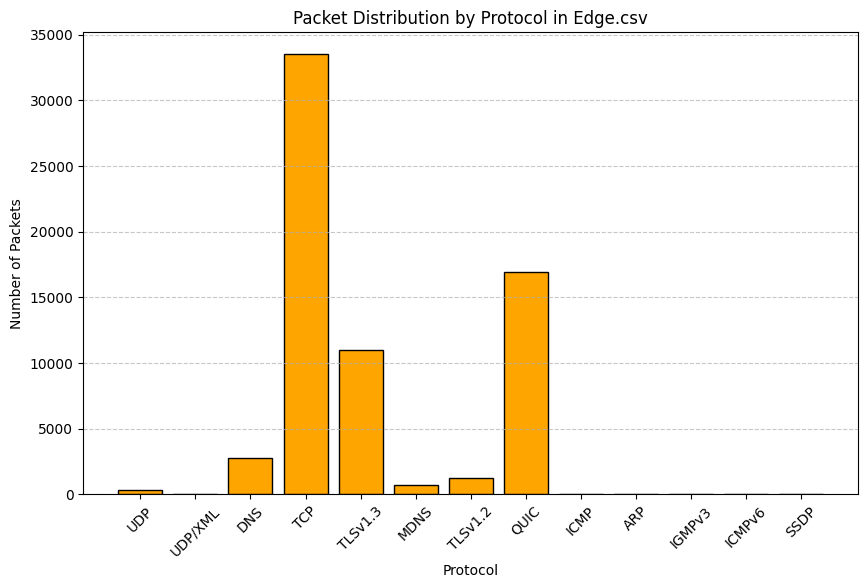


File: Spotify_no_signin.csv
    TLSv1.2: 1233 packets
    TCP: 4065 packets
    TLSv1.3: 18 packets
    HTTP2: 22 packets
    ARP: 156 packets
    QUIC: 15 packets
    UDP: 153 packets
    DNS: 48 packets
    ICMPv6: 6 packets
    IGMPv3: 11 packets
    MDNS: 32 packets
    LLMNR: 26 packets
    HTTP2/JSON: 2 packets
    UDP/XML: 14 packets
    HTTP: 4 packets


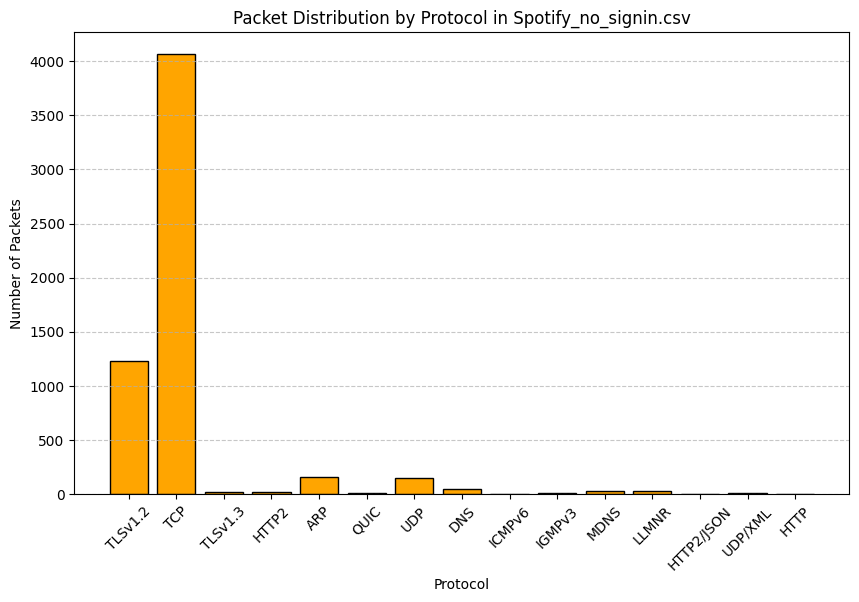


File: Spotify_signin.csv
    UDP: 152 packets
    DNS: 217 packets
    TCP: 14208 packets
    TLSv1.2: 83 packets
    MDNS: 136 packets
    LLMNR: 16 packets
    QUIC: 138 packets
    TLSv1.3: 3129 packets
    HTTP2: 3879 packets
    DoH: 542 packets
    HTTP2/JSON: 253 packets
    IGMPv3: 8 packets
    ARP: 166 packets
    HTTP2/PB(<UNKNOWN>): 6 packets
    HTTP: 47 packets
    WebSocket: 19 packets
    HTTP/JSON: 1 packets
    MP4: 2 packets
    SSLv2: 6 packets


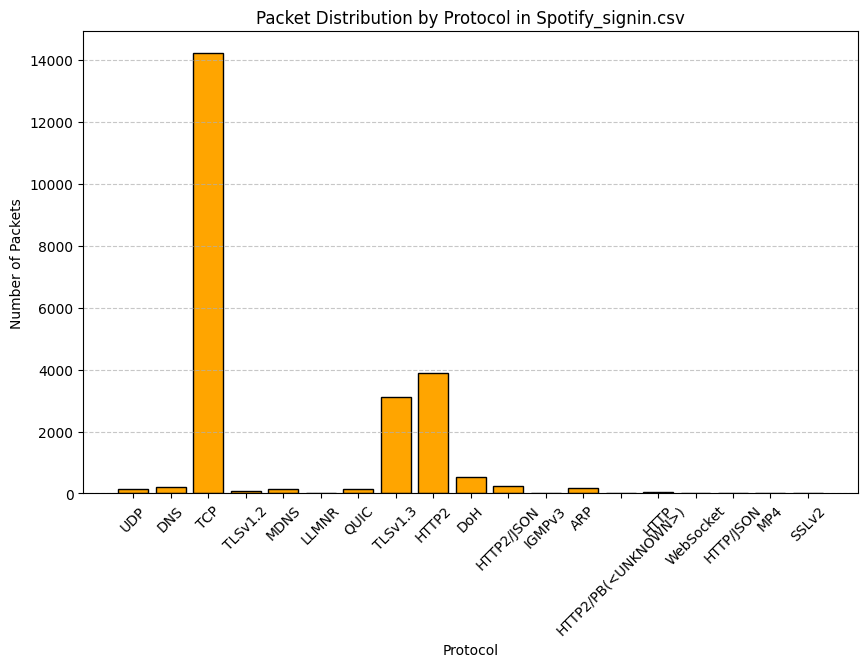


File: YouTube_240.csv
    UDP: 155 packets
    DNS: 131 packets
    QUIC: 66 packets
    TCP: 10977 packets
    MDNS: 130 packets
    TLSv1.3: 2203 packets
    HTTP2: 1104 packets
    DoH: 170 packets
    ARP: 163 packets
    HTTP2/JSON: 43 packets
    TLSv1.2: 107 packets
    HTTP2/PB(<UNKNOWN>): 2 packets
    HTTP2/XML: 1 packets
    HTTP: 53 packets
    SSLv2: 3 packets
    IGMPv3: 13 packets
    ICMPv6: 6 packets
    LLMNR: 22 packets
    UDP/XML: 14 packets


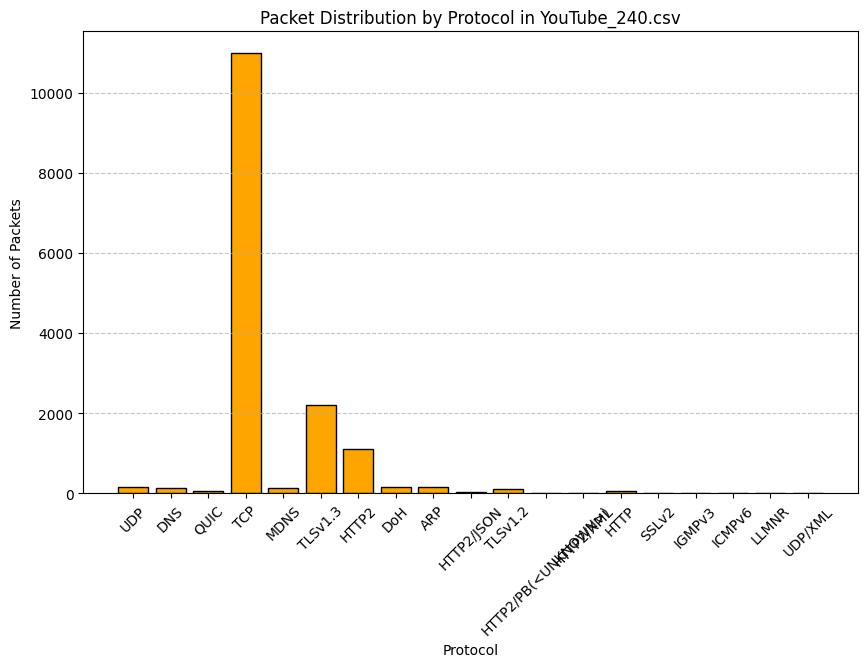


File: YouTube_720.csv
    UDP: 150 packets
    DNS: 72 packets
    QUIC: 78 packets
    TCP: 29733 packets
    TLSv1.3: 6289 packets
    MDNS: 46 packets
    HTTP2: 1588 packets
    DoH: 178 packets
    ARP: 154 packets
    HTTP2/JSON: 58 packets
    LLMNR: 8 packets
    TLSv1.2: 14 packets
    HTTP: 55 packets
    HTTP2/PB(<UNKNOWN>): 1 packets
    SSLv2: 27 packets
    UDP/XML: 42 packets
    IGMPv3: 8 packets
    HTTP/XML: 1 packets


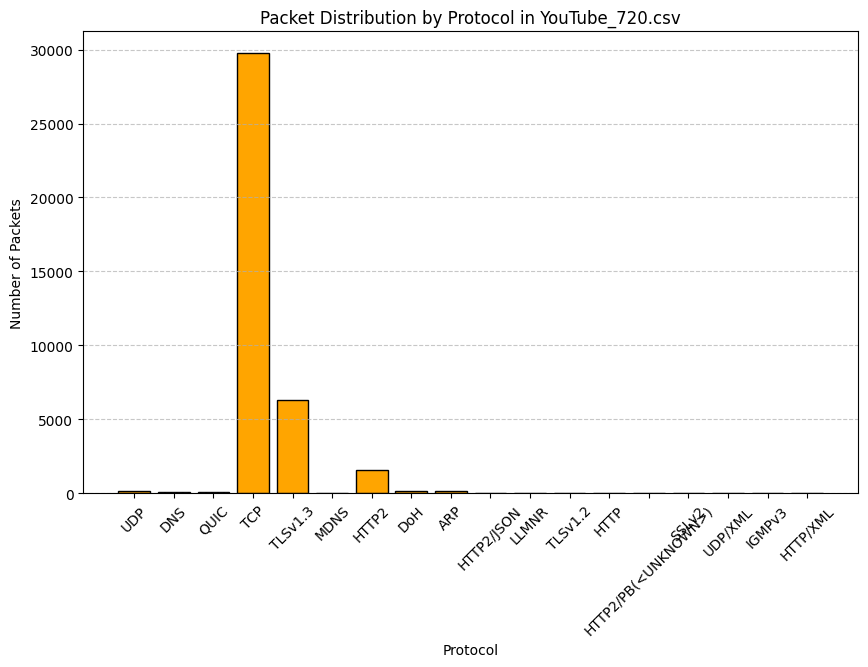


File: YouTube_1080.csv
    ARP: 166 packets
    DNS: 84 packets
    QUIC: 60 packets
    TCP: 38810 packets
    TLSv1.3: 11390 packets
    MDNS: 68 packets
    HTTP2: 1559 packets
    DoH: 192 packets
    HTTP2/JSON: 76 packets
    UDP: 138 packets
    HTTP: 63 packets
    IGMPv3: 8 packets
    HTTP2/PB(<UNKNOWN>): 2 packets
    SSLv2: 61 packets
    ICMPv6: 1 packets
    LLMNR: 8 packets
    TLSv1.2: 36 packets


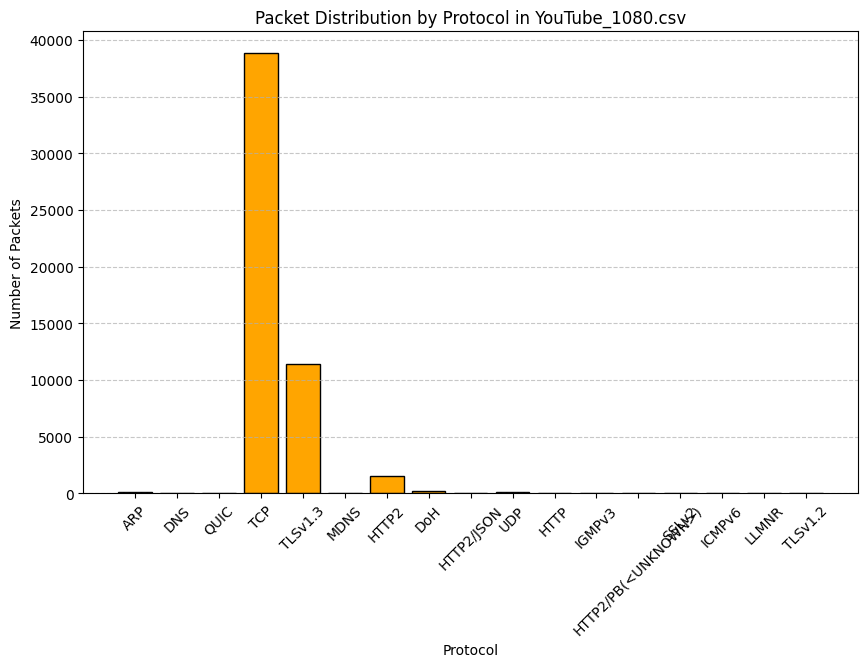


File: zoom.csv
    UDP: 37960 packets
    ARP: 125 packets
    TCP: 5317 packets
    DNS: 179 packets
    TLSv1.3: 3009 packets
    MDNS: 96 packets
    HTTP2: 402 packets
    HTTP2/JSON: 35 packets
    TLSv1.2: 160 packets
    HTTP: 65 packets
    SSDP: 25 packets
    WireGuard: 380 packets
    QUIC: 5538 packets
    HTTP3: 571 packets
    IGMPv3: 13 packets
    ICMPv6: 14 packets
    LLMNR: 10 packets
    HTTP/XML: 257 packets



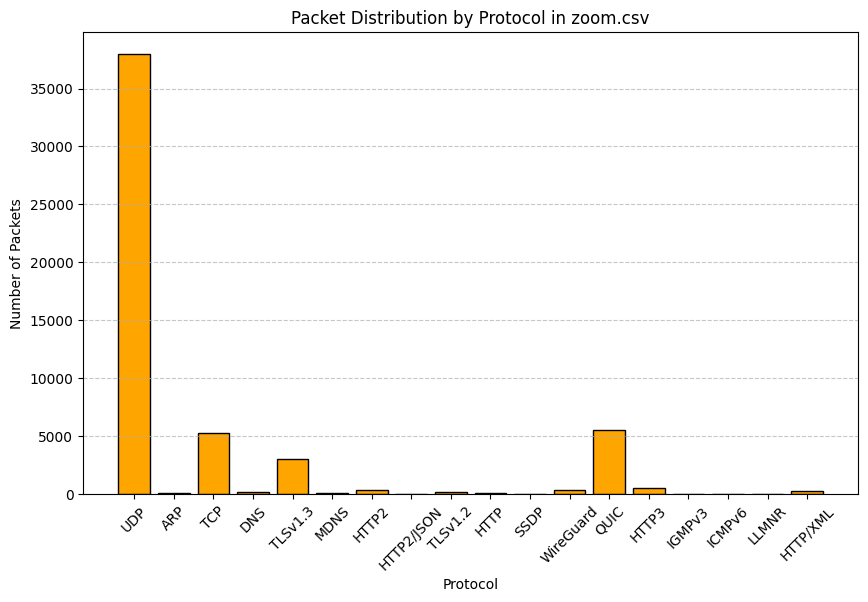

In [33]:
analyze_packet_count_by_protocol(files)

## bonus


File: bonus.csv
    UDP: 307 packets
    TCP: 21252 packets
    SSDP: 10 packets
    HTTP: 3 packets
    HTTP/XML: 1 packets
    TLSv1.2: 2482 packets
    QUIC: 12019 packets
    DNS: 1326 packets
    TLSv1.3: 6472 packets
    ARP: 126 packets
    ieee1905: 9 packets
    MDNS: 14 packets
    ICMP: 7 packets
    AJP13: 2 packets
    IGMPv3: 15 packets
    IGMPv2: 3 packets
    ICMPv6: 11 packets
    SSLv2: 2 packets


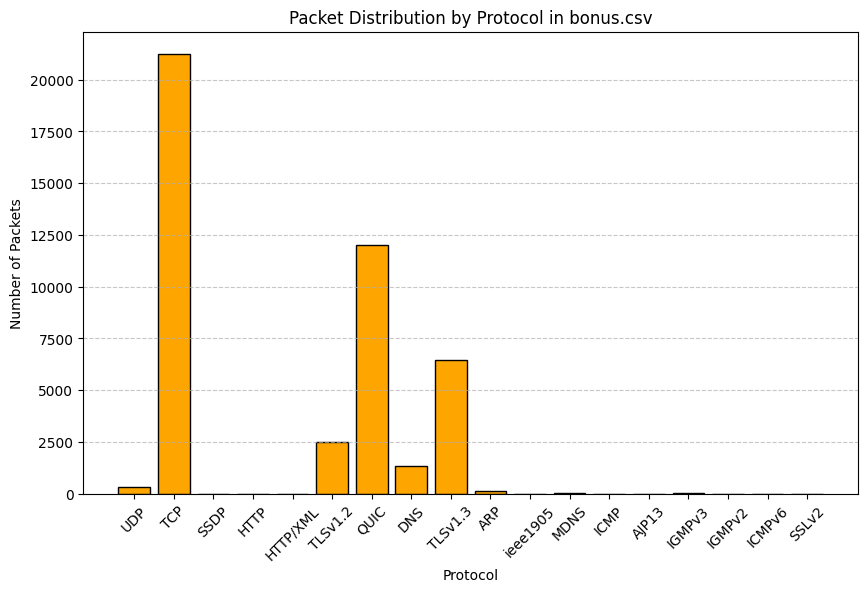

In [34]:
file = ['bonus.csv']
analyze_packet_count_by_protocol(file)

In [35]:
def plot_flow_duration(filenames, labels, combine_plots=False):
    """
    Plots the duration of each flow in the dataset, with the option to show all flow distributions together or separately.

    This function reads multiple CSV files, groups the data into flows based on source and destination 
    addresses and ports, calculates the duration of each flow (the time difference between the first 
    and last packet of the flow), and generates histograms to visualize the distribution of flow durations.

    Parameters:
    - filenames: List of file paths to CSV files containing packet data, including columns
      for 'Source', 'Source port', 'Destination', 'Destination port', and 'Time'.
    - labels: List of labels corresponding to each file, used for the plot legend.
    - combine_plots: If True, combines all flow duration distributions in a single plot.
      If False, generates a separate plot for each file. Default is False.

    Functionality:
    1. Reads each CSV file and calculates the duration for each flow (based on source/destination IP and port).
    2. Generates histograms to show the distribution of flow durations.
    3. Optionally combines all flow duration distributions in a single plot or keeps them separate.
    4. Prints the average flow duration for each dataset.

    The function is useful for analyzing flow characteristics and comparing flow duration distributions 
    across different traffic datasets or applications.
    """
    average_durations = []
    
    if combine_plots:
        plt.figure(figsize=(12, 6))
    
    for file, label in zip(filenames, labels):
        df = pd.read_csv(file)
        
        df['Flow ID'] = df['Source'].astype(str) + ":" + df['Source port'].astype(str) + " -> " + \
                        df['Destination'].astype(str) + ":" + df['Destination port'].astype(str)
        
        flows = df.groupby('Flow ID')
        
        flow_durations = []

        for flow_id, flow_data in flows:
            start_time = flow_data['Time'].min()
            end_time = flow_data['Time'].max()
            duration = end_time - start_time
            flow_durations.append(duration)
        
        average_duration = sum(flow_durations) / len(flow_durations) if flow_durations else 0
        
        average_durations.append((label, average_duration))

        if combine_plots:
            plt.hist(flow_durations, bins=50, alpha=0.5, label=label)
        else:
            plt.figure(figsize=(12, 6))
            plt.hist(flow_durations, bins=50, alpha=0.5, label=label)
            plt.xlabel("Flow Duration (seconds)")
            plt.ylabel("Frequency")
            plt.title(f"{label} - Flow Duration Distribution")
            plt.legend()
            plt.grid()
            plt.show()

    if average_durations:
        for label, avg_duration in average_durations:
            print(f"{label}: {avg_duration:.2f} seconds")
    
    if combine_plots:
        plt.xlabel("Flow Duration (seconds)")
        plt.ylabel("Frequency")
        plt.title("Flow Duration Distribution Across Applications")
        plt.legend()
        plt.grid()
        plt.show()


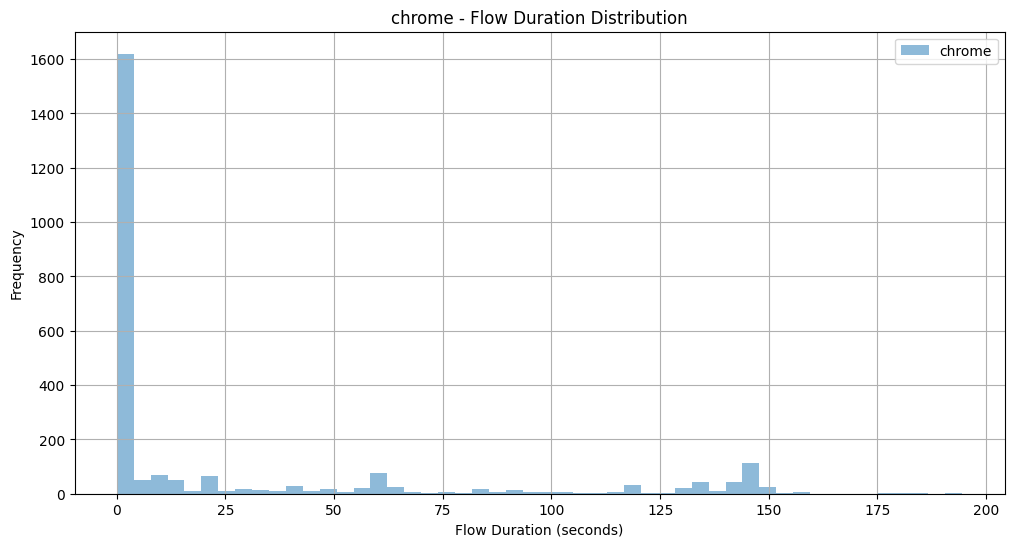

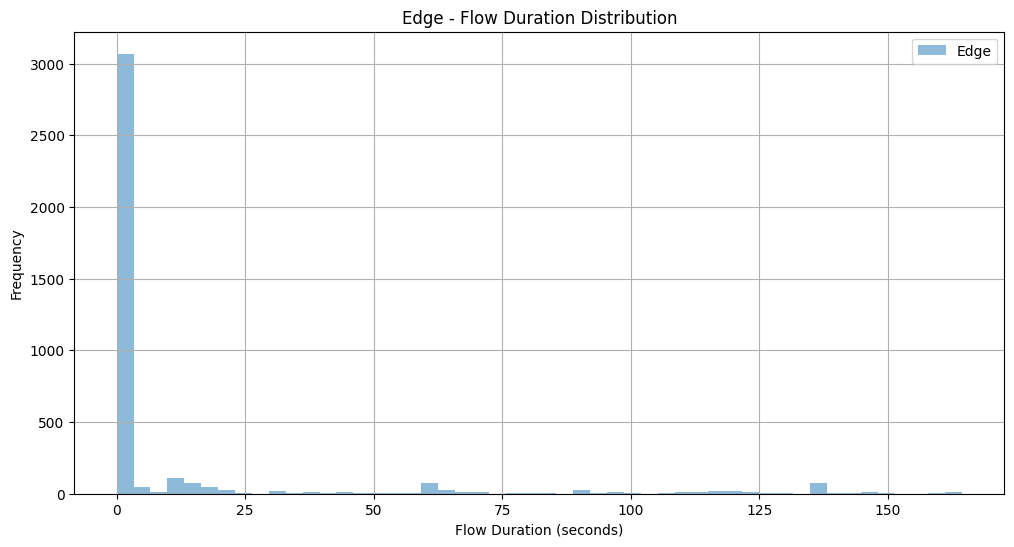

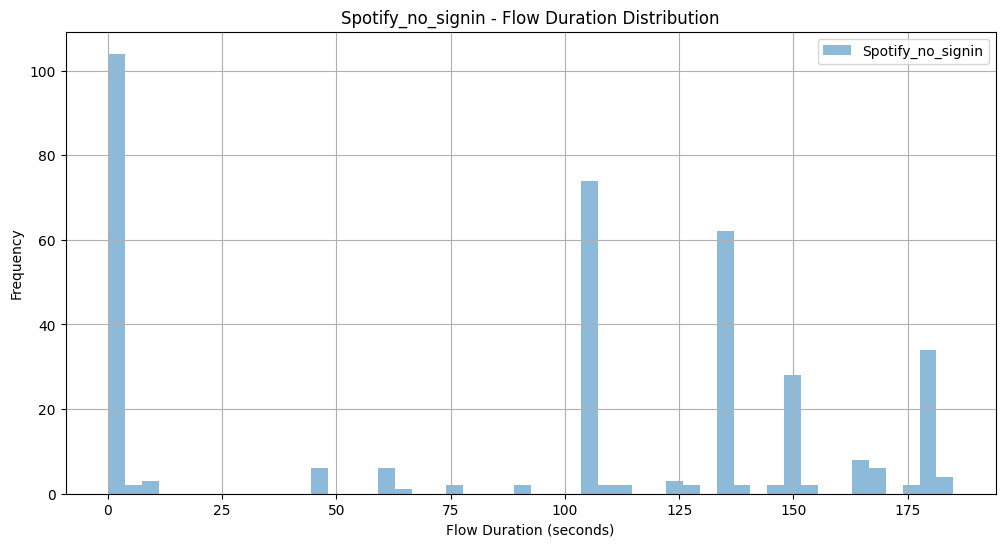

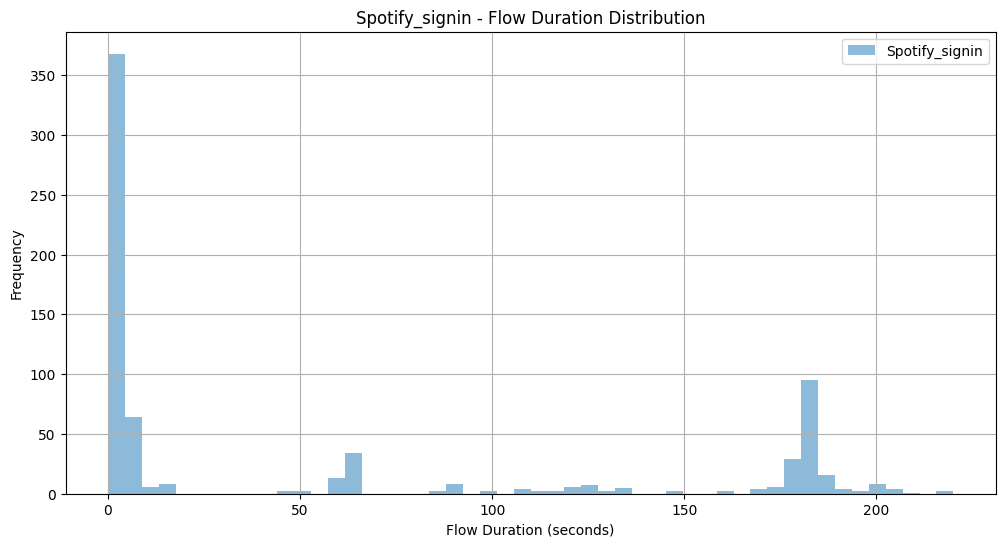

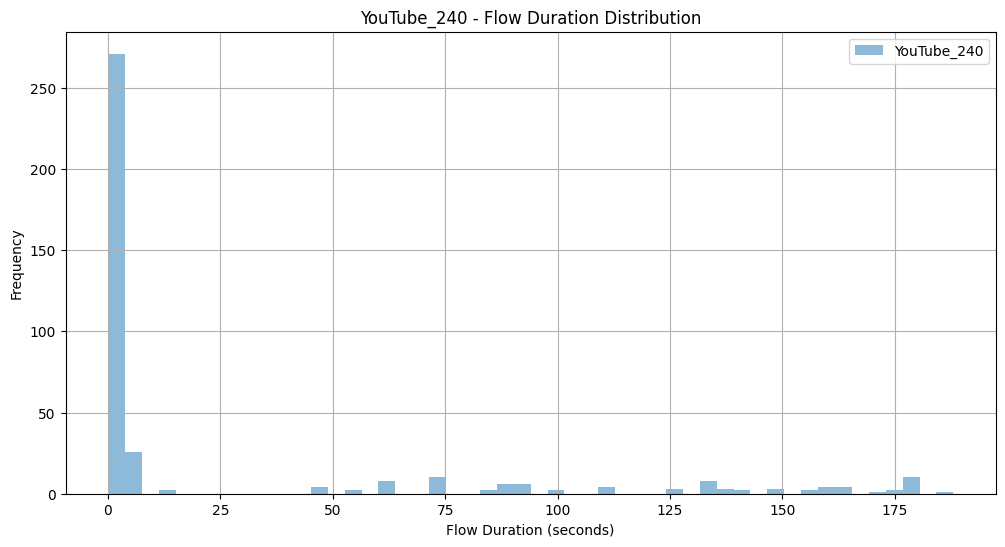

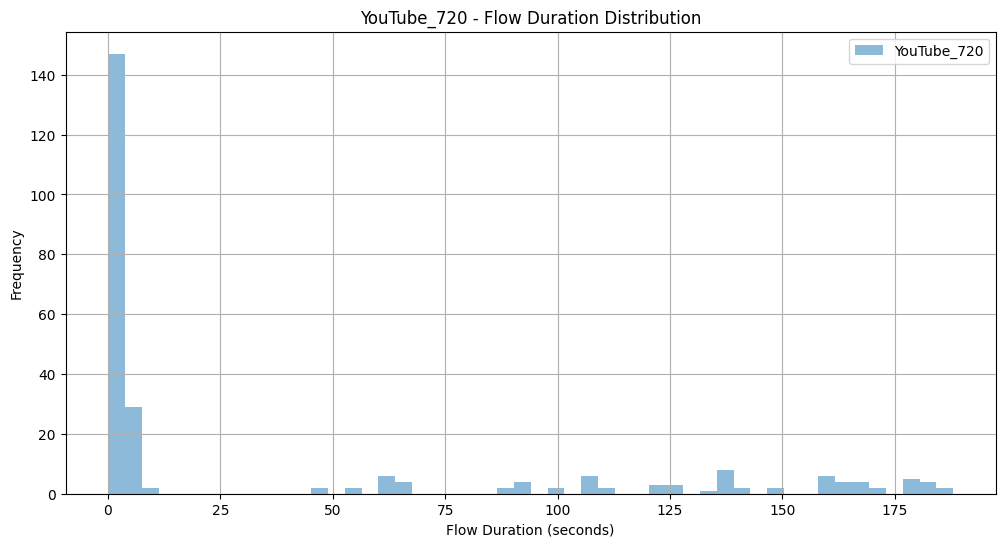

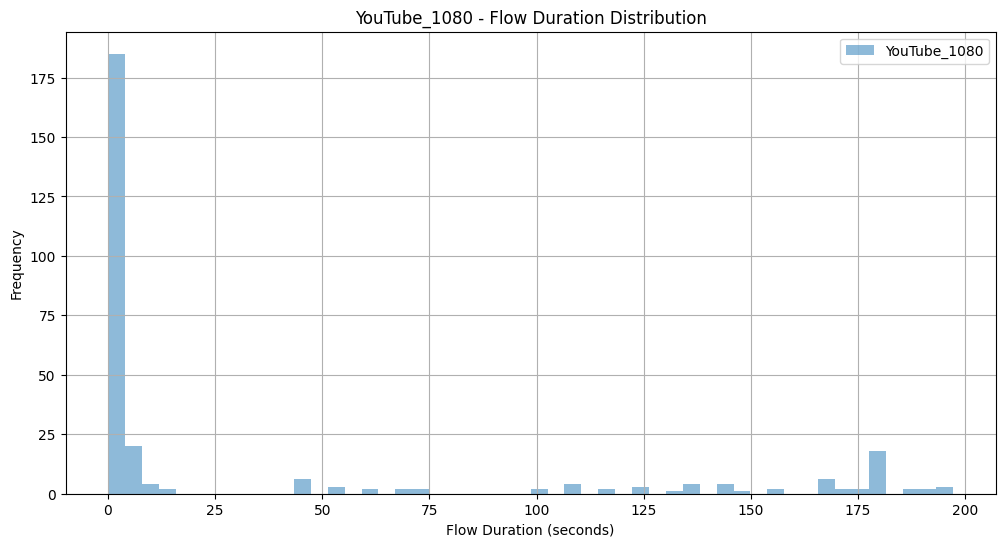

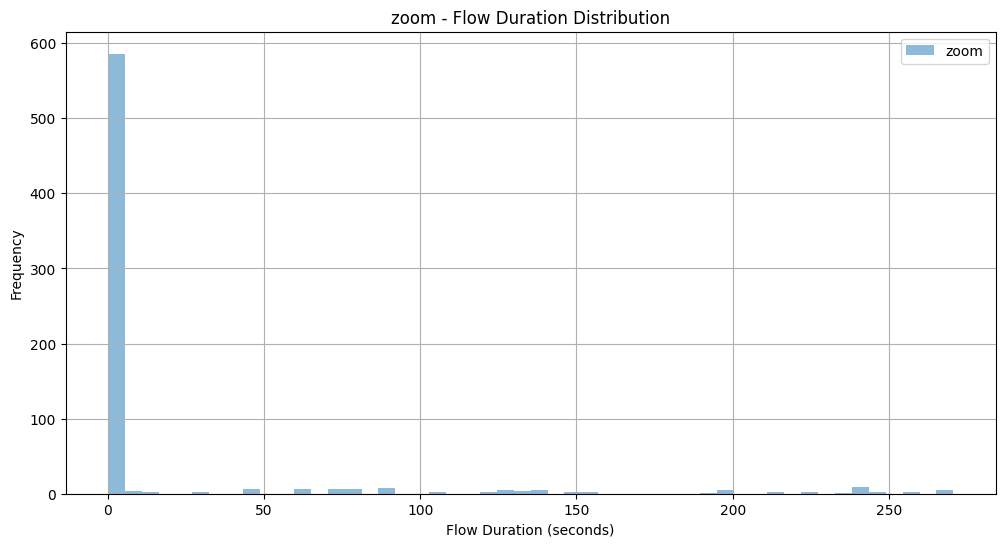

chrome: 26.80 seconds
Edge: 12.38 seconds
Spotify_no_signin: 91.64 seconds
Spotify_signin: 57.15 seconds
YouTube_240: 26.87 seconds
YouTube_720: 38.63 seconds
YouTube_1080: 36.52 seconds
zoom: 17.93 seconds


In [36]:
plot_flow_duration(files, labels)

In [37]:
def plot_TCP_Flag_Distribution(files):
    """
    Analyzes and visualizes the distribution of TCP flags in network packet data.

    This function reads multiple CSV files containing packet data and identifies the TCP flags 
    present in the 'Info' column. It then generates bar charts to visualize the distribution 
    of various TCP flags.

    Parameters:
    - files: List of file paths to CSV files containing packet data, including an 'Info' column 
      where the TCP flags are indicated (e.g., 'SYN', 'FIN', 'RST', 'ACK', etc.).

    Functionality:
    1. Reads each CSV file and processes the 'Info' column to identify TCP flags.
    2. Counts the occurrences of each unique combination of TCP flags.
    3. Prints the count of each flag combination.
    4. Plots a bar chart showing the distribution of the TCP flags, along with their respective percentages.

    This function is useful for analyzing the frequency and distribution of different TCP flags 
    in network traffic, which is important for network analysis and troubleshooting.
    """
    for file in files:
        flag_counts = Counter()
        df = pd.read_csv(file,encoding='ISO-8859-1')
        
        for row in df['Info'].dropna():
            flags = []
            
            if 'SYN' in row:
                flags.append('SYN')
            if 'FIN' in row:
                flags.append('FIN')
            if 'RST' in row:
                flags.append('RST')
            if 'PSH' in row:
                flags.append('PSH')
            if 'URG' in row:
                flags.append('URG')
            if 'ECE' in row:
                flags.append('ECE')
            if 'CWR' in row:
                flags.append('CWR')
            if 'ACE' in row:
                flags.append('ACE')

            if 'ACK' in row:
                if flags: 
                    flags.append('ACK')
                else:
                    flags.append('ACK')

            if flags:
                flag_counts['_'.join(flags)] += 1 
            
        print(flag_counts)
        
        flag_names = list(flag_counts.keys())
        counts = list(flag_counts.values())
        
        total_count = sum(counts)
        percentages = [(count / total_count) * 100 if total_count > 0 else 0 for count in counts]
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(flag_names, counts, color='skyblue')
        
        for i, bar in enumerate(bars):
            yval = bar.get_height()
            percentage = f'{percentages[i]:.2f}%'
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, percentage, ha='center', va='bottom', fontsize=10,
                     color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
        
        plt.xticks(rotation=45, ha='right')
        plt.title(f"TCP Flag Distribution {file}")
        plt.xlabel("TCP Flags")
        plt.ylabel("Count")
        plt.show()


Counter({'ACK': 38674, 'PSH_ACK': 5708, 'SYN_ACK': 1060, 'FIN_ACK': 935, 'RST_ACK': 187, 'RST': 88, 'ACE': 14, 'ECE': 1, 'FIN': 1})


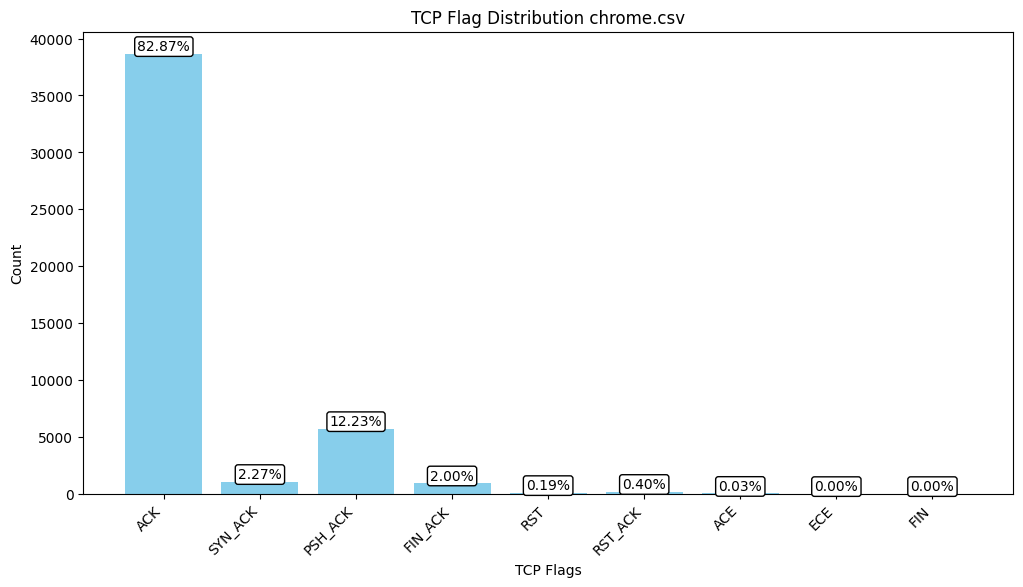

Counter({'ACK': 26556, 'PSH_ACK': 6338, 'SYN_ACK': 794, 'FIN_ACK': 320, 'RST_ACK': 85, 'RST': 18, 'FIN_PSH_ACK': 2})


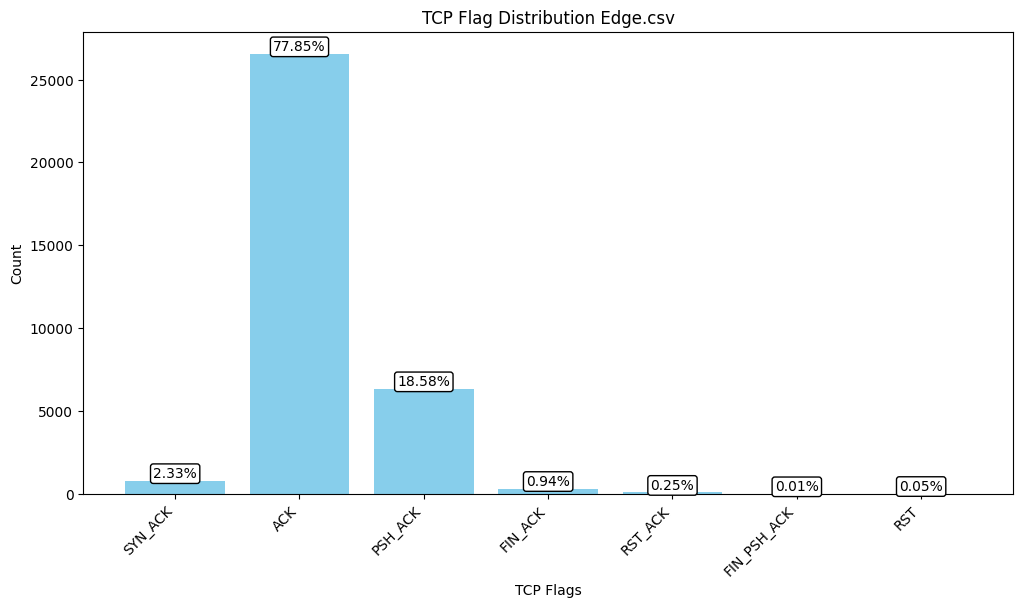

Counter({'ACK': 3038, 'PSH_ACK': 848, 'FIN_ACK': 146, 'SYN_ACK': 26, 'RST_ACK': 5, 'RST': 3})


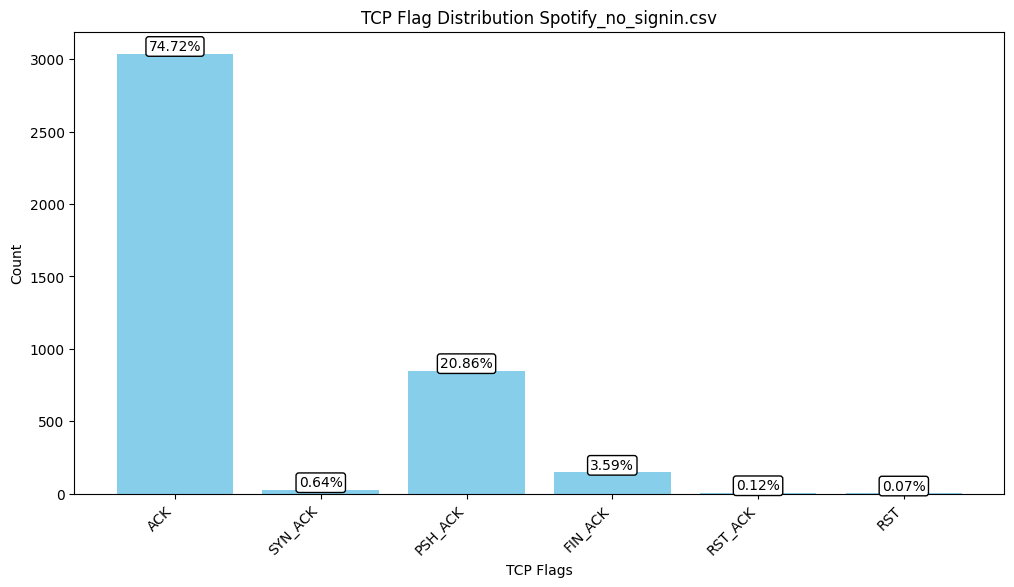

Counter({'ACK': 11093, 'PSH_ACK': 2375, 'SYN_ACK': 464, 'FIN_ACK': 262, 'RST': 62, 'FIN': 23, 'RST_ACK': 10, 'FIN_PSH_ACK': 1, 'SYN': 1, 'ACE': 1})


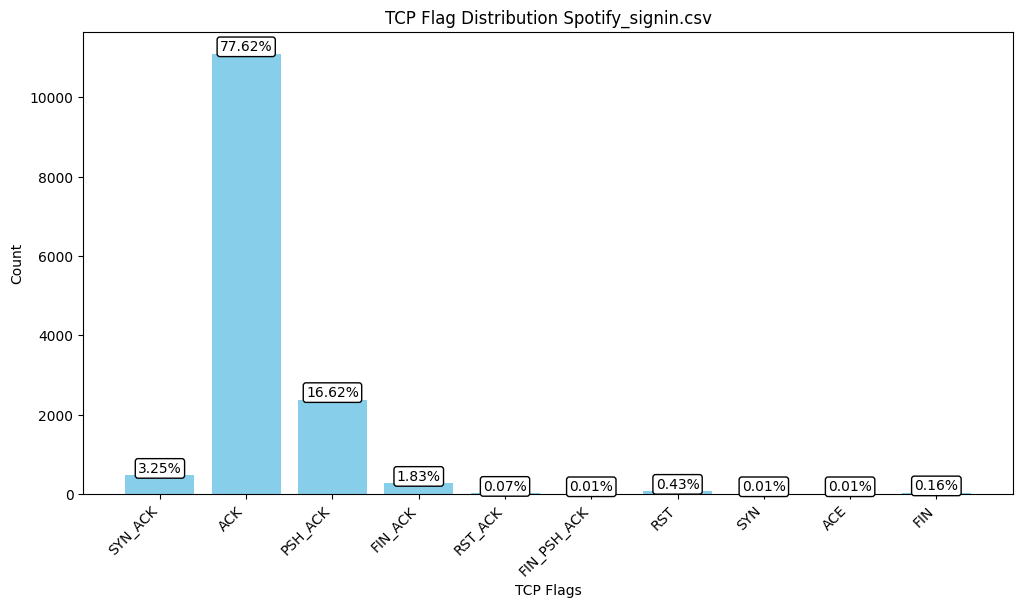

Counter({'ACK': 7719, 'PSH_ACK': 2896, 'SYN_ACK': 222, 'FIN_ACK': 130, 'RST': 15, 'RST_ACK': 9, 'ACE': 5})


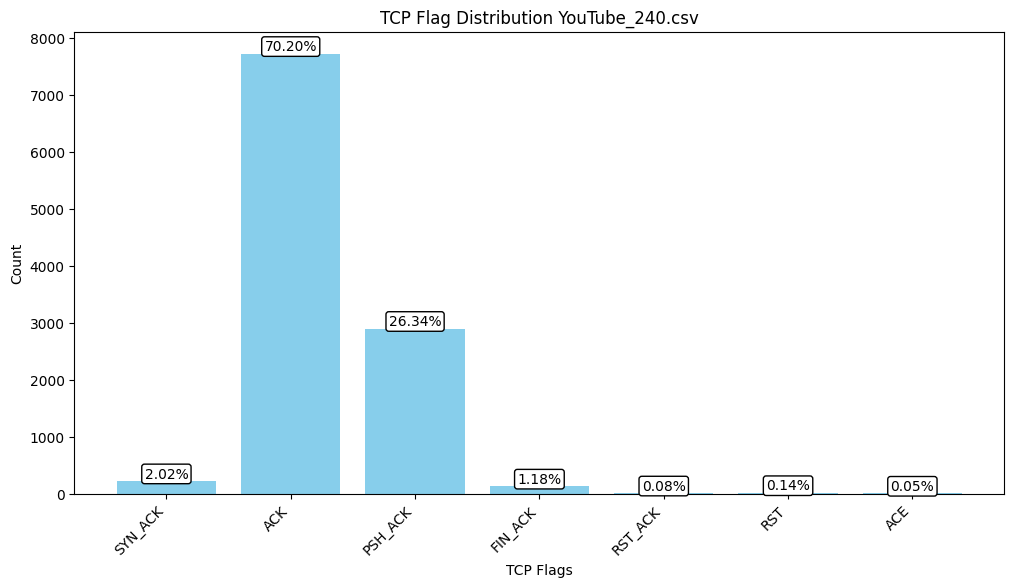

Counter({'ACK': 20054, 'PSH_ACK': 9429, 'SYN_ACK': 150, 'FIN_ACK': 91, 'ACE': 55, 'RST': 29, 'RST_ACK': 6, 'URG': 3, 'FIN_PSH_ACK': 1})


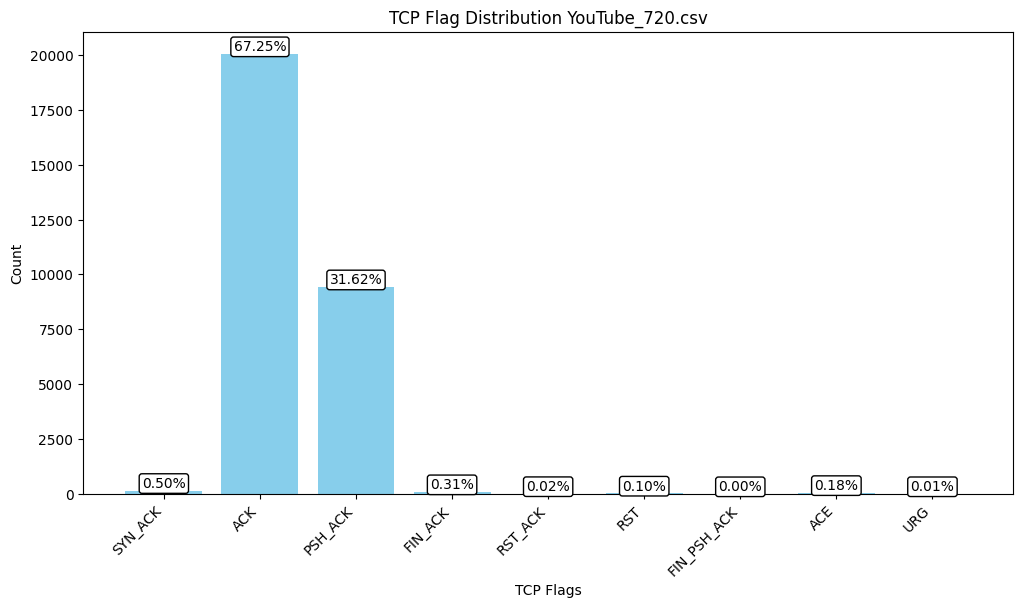

Counter({'ACK': 26302, 'PSH_ACK': 12223, 'SYN_ACK': 172, 'FIN_ACK': 100, 'RST': 29, 'RST_ACK': 11, 'ACE': 1})


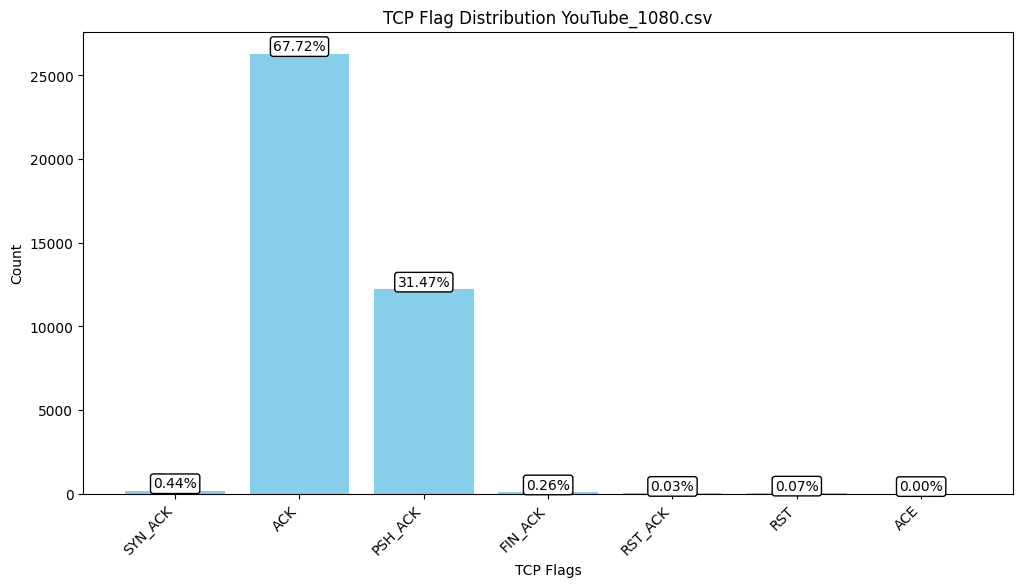

Counter({'ACK': 4918, 'SYN_ACK': 452, 'PSH_ACK': 369, 'FIN_ACK': 264, 'FIN_PSH_ACK': 44, 'RST_ACK': 24, 'RST': 10, 'ECE': 1})


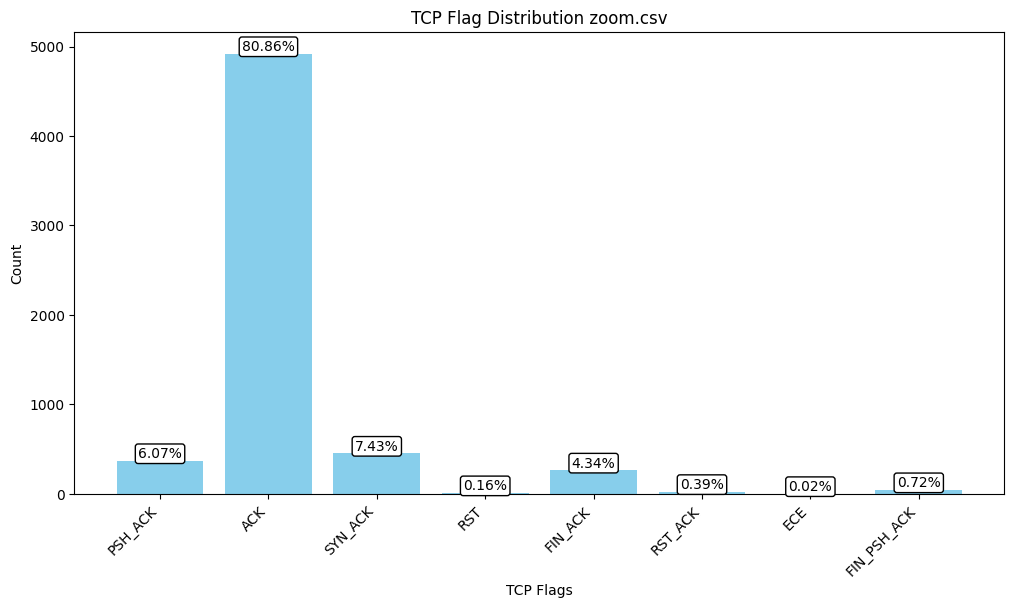

In [38]:
plot_TCP_Flag_Distribution(files)

## bonus

Counter({'ACK': 17645, 'PSH_ACK': 2938, 'SYN_ACK': 650, 'FIN_ACK': 288, 'RST': 149, 'RST_ACK': 34})


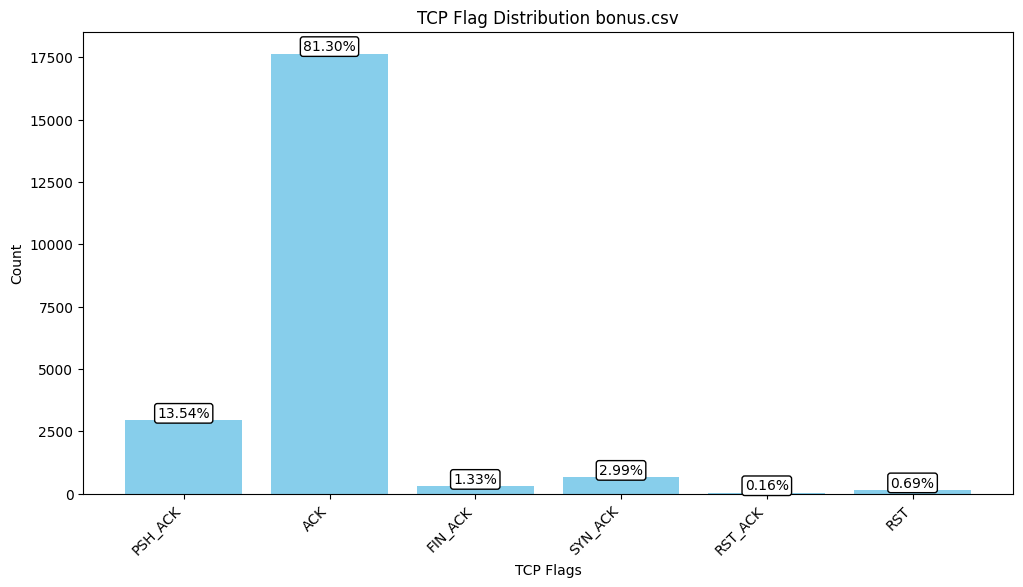

In [39]:
file = ['bonus.csv']
plot_TCP_Flag_Distribution(file)